# MODULE 1 : IMBALANCED LEARNING

---

### libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, RepeatedStratifiedKFold, cross_val_score
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc
from sklearn.preprocessing import MinMaxScaler, label_binarize
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, CondensedNearestNeighbour, EditedNearestNeighbours, ClusterCentroids
from sklearn.cluster import MiniBatchKMeans
from imblearn.over_sampling import RandomOverSampler, SMOTE, ADASYN
from sklearn.tree._tree import TREE_LEAF

### 0) Data Visualization

seleziono la feature target: **groupedRating = {3, 4, 5, 6, 7, 8, 9}**

In [2]:
# =============================================================================
# PART 1.1: Data Loading, Preprocessing & Normalization (Normal Preprocessed Dataset)
# =============================================================================

# 1. Load the preprocessed train and test datasets from CSV
train_data_preprocessed = pd.read_csv("../../../0) dataset/1) preprocessed dataset/train_preprocessed.csv")
test_data_preprocessed  = pd.read_csv("../../../0) dataset/1) preprocessed dataset/test_preprocessed.csv")

# Drop the 'Unnamed: 0' column if it exists
train_data_preprocessed.drop(columns='Unnamed: 0', inplace=True, errors='ignore')
test_data_preprocessed.drop(columns='Unnamed: 0', inplace=True, errors='ignore')

# 2. Map the original "rating" into the new target "groupedRating"
def map_rating(r):
    # Map ratings 0, 1, 2, and 3 to 3; leave other ratings unchanged.
    if r in [0, 1, 2, 3]:
        return 3
    else:
        return r

train_data_preprocessed["groupedRating"] = train_data_preprocessed["rating"].apply(map_rating)
test_data_preprocessed["groupedRating"]  = test_data_preprocessed["rating"].apply(map_rating)

# Define the new target variable
target = "groupedRating"

# 3. Extract numerical columns dynamically from the training set
attributes = list(np.unique(train_data_preprocessed.select_dtypes(include=['int', 'float64']).columns))

# Remove dangerous features: remove the original "rating" and the target "groupedRating"
unwanted_values = {'rating', 'groupedRating', 'averageRating'}
attributes = [attr for attr in attributes if attr not in unwanted_values]
print("Initial numerical features:", attributes)

# 4. Define the feature matrix (X) and target vector (y) for both train and test sets
# Use new variable names to avoid conflict with outliers removed dataset
X_train_preprocessed = train_data_preprocessed[attributes].values
y_train_preprocessed = train_data_preprocessed[target].values

X_test_preprocessed  = test_data_preprocessed[attributes].values
y_test_preprocessed  = test_data_preprocessed[target].values

# 5. Normalize the features using StandardScaler
scaler_preprocessed = MinMaxScaler()
X_train_scaled_preprocessed = scaler_preprocessed.fit_transform(X_train_preprocessed)
X_test_scaled_preprocessed  = scaler_preprocessed.transform(X_test_preprocessed)

Initial numerical features: ['Action', 'Adventure', 'Animation', 'Asia', 'Australia/Oceania', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Europe', 'Middle East', 'North Africa', 'North America', 'Series', 'Short', 'South Africa', 'South America', 'awardNominationsExcludeWinsLog', 'awardWinsLog', 'castNumberLog', 'companiesNumberLog', 'criticReviewsTotalLog', 'directorsCreditsLog', 'externalLinksLog', 'isAdult', 'movie', 'numRegionsLog', 'numVotesLog', 'other', 'others', 'quotesTotalLog', 'runtimeMinutes', 'short', 'startYear', 'totalCreditsLog', 'totalImagesLog', 'totalVideosLog', 'userReviewsTotalLog', 'writerCreditsLog']


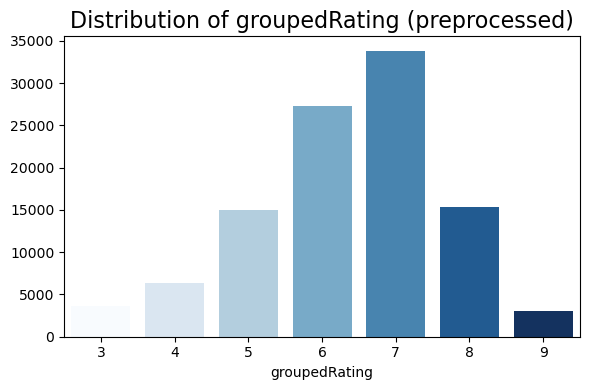

In [3]:
# Plot the target class distribution using training data from the preprocessed dataset
target_counts = train_data_preprocessed[target].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index, palette='Blues', legend=False)
plt.title("Distribution of groupedRating (preprocessed)", fontsize=16)
plt.tight_layout()
plt.show()

In [4]:
# =============================================================================
# PART 1.2: Data Loading, Preprocessing & Normalization (Outliers Removed Dataset)
# =============================================================================

# 1. Load the preprocessed and outliers removed train and test datasets from CSV
train_data_nooutliers = pd.read_csv("../0) dataset/2) preprocessed e no outliers dataset/train_preprocessed_nooutliers.csv")
test_data_nooutliers  = pd.read_csv("../0) dataset/2) preprocessed e no outliers dataset/test_preprocessed_nooutliers.csv")

# Drop the 'Unnamed: 0' column if it exists
train_data_nooutliers.drop(columns='Unnamed: 0', inplace=True, errors='ignore')
test_data_nooutliers.drop(columns='Unnamed: 0', inplace=True, errors='ignore')

# 2. Map the original "rating" into the new target "groupedRating"
def map_rating(r):
    # Map ratings 0, 1, 2, and 3 to 3; leave other ratings unchanged.
    if r in [0, 1, 2, 3]:
        return 3
    else:
        return r

train_data_nooutliers["groupedRating"] = train_data_nooutliers["rating"].apply(map_rating)
test_data_nooutliers["groupedRating"]  = test_data_nooutliers["rating"].apply(map_rating)

# Define the new target variable
target = "groupedRating"

# 3. Extract numerical columns dynamically from the training set
attributes = list(np.unique(train_data_nooutliers.select_dtypes(include=['int', 'float64']).columns))

# Remove dangerous features: remove the original "rating" and the target "groupedRating"
unwanted_values = {'rating', 'groupedRating', 'averageRating'}
attributes = [attr for attr in attributes if attr not in unwanted_values]
print("Initial numerical features:", attributes)

# 4. Define the feature matrix (X) and target vector (y) for both train and test sets
X_train_nooutliers = train_data_nooutliers[attributes].values
y_train_nooutliers = train_data_nooutliers[target].values

X_test_nooutliers  = test_data_nooutliers[attributes].values
y_test_nooutliers  = test_data_nooutliers[target].values

# 5. Normalize the features using StandardScaler
scaler_nooutliers = MinMaxScaler()
X_train_scaled_nooutliers = scaler_nooutliers.fit_transform(X_train_nooutliers)
X_test_scaled_nooutliers  = scaler_nooutliers.transform(X_test_nooutliers)

Initial numerical features: ['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Series', 'Short', 'awardNominationsExcludeWinsLog', 'awardWinsLog', 'castNumberLog', 'companiesNumberLog', 'criticReviewsTotalLog', 'directorsCreditsLog', 'externalLinksLog', 'isAdult', 'movie', 'numRegionsLog', 'numVotesLog', 'other', 'others', 'quotesTotalLog', 'ratingCountLog', 'runtimeMinutes', 'short', 'startYear', 'totalCreditsLog', 'totalImagesLog', 'totalVideosLog', 'userReviewsTotalLog', 'writerCreditsLog']


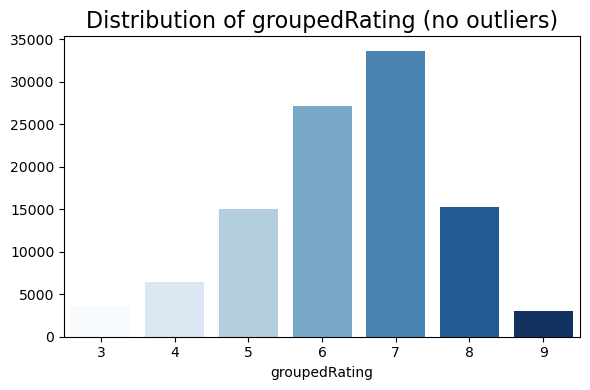

In [5]:
# Plot the target class distribution using training data from the preprocessed dataset
target_counts = train_data_nooutliers[target].value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts.index, y=target_counts.values, hue=target_counts.index, palette='Blues', legend=False)
plt.title("Distribution of groupedRating (no outliers)", fontsize=16)
plt.tight_layout()
plt.show()

### 1) normal ML models execution

proviamo **DT** e **KNN** sul dataset normale per vedere le loro performance a monte

### 1.1) DT


Best hyperparameters for DT: {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 9, 'criterion': 'entropy'}
Best cross-validated score for DT: 0.39579923967130415

Decision Tree Classifier Report:
              precision    recall  f1-score   support

           3       0.25      0.06      0.09      1585
           4       0.46      0.05      0.08      2688
           5       0.33      0.28      0.30      6279
           6       0.36      0.35      0.35     11696
           7       0.42      0.72      0.53     14657
           8       0.27      0.10      0.14      6677
           9       0.46      0.03      0.06      1278

    accuracy                           0.39     44860
   macro avg       0.36      0.23      0.22     44860
weighted avg       0.37      0.39      0.34     44860



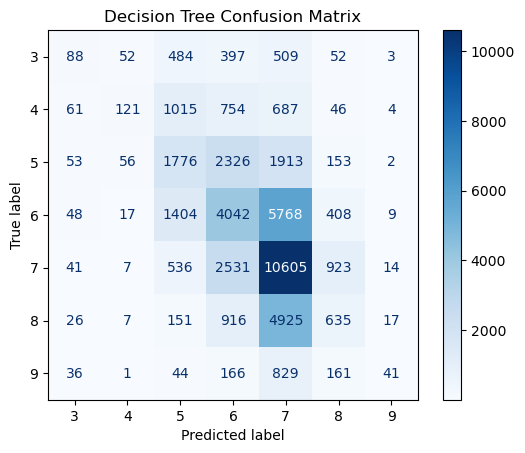

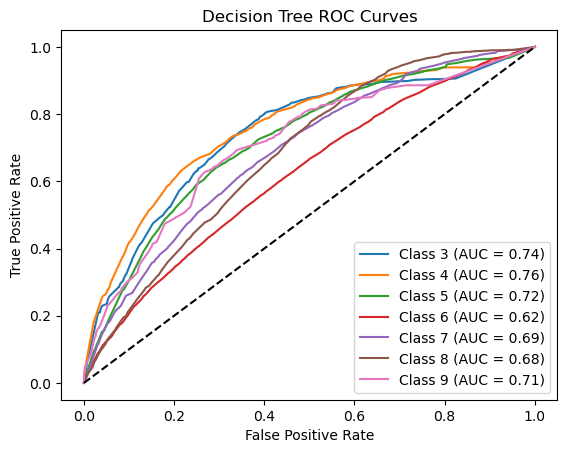

In [6]:
# =============================================================================
# PART 2: Decision Tree Classifier with Normalization & Robust Hyperparameter Tuning
# (For the new target: groupedRating, using the preprocessed dataset)
# =============================================================================

"""
# --- Step A: Initial Feature Importance Analysis using DT ---
# (Commented out for reference)
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_scaled_preprocessed, y_train_preprocessed)
zipped = sorted(zip(attributes, dt.feature_importances_), key=lambda x: x[1], reverse=True)
print("\nFeature importances from initial DT model:")
selected_features_dt = []  # To store features with importance above threshold
for col, imp in zipped:
    print(f"{col}: {imp*100:.2f}%")
    if imp > 0.005:
        selected_features_dt.append(col)
print("Selected features for DT (importance > 0.5%):", selected_features_dt)

# Instead, we use these manually selected features:
Selected features for DT (importance > 0.5%): ['runtimeMinutes', 'totalCreditsLog', 'startYear', 'castNumberLog', 'ratingCountLog', 'numVotesLog', 'companiesNumberLog', 'totalImagesLog', 'writerCreditsLog', 'externalLinksLog', 'Series', 'numRegionsLog', 'userReviewsTotalLog', 'directorsCreditsLog', 'criticReviewsTotalLog', 'others', 'Comedy', 'quotesTotalLog', 'Drama', 'awardWinsLog', 'Action', 'Adventure', 'awardNominationsExcludeWinsLog', 'Crime', 'Documentary', 'totalVideosLog']

# --- Step B: Re-prepare the dataset using only the selected features ---
# Use the preprocessed datasets (without outliers removed)
X_train_dt = train_data_preprocessed[selected_features_dt].values
y_train_dt = train_data_preprocessed["groupedRating"].values

X_test_dt = test_data_preprocessed[selected_features_dt].values
y_test_dt = test_data_preprocessed["groupedRating"].values

# Normalize the selected features using MinMaxScaler (for consistency)
scaler_dt = MinMaxScaler()
X_train_dt_scaled = scaler_dt.fit_transform(X_train_dt)
X_test_dt_scaled = scaler_dt.transform(X_test_dt)
"""

# --- Step C: Hyperparameter Tuning for Decision Tree using RandomizedSearchCV ---
param_grid_dt = {
    'max_depth': list(np.arange(2, 10)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_dt_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_dt_preprocessed.fit(X_train_scaled_preprocessed, y_train_preprocessed)

print("\nBest hyperparameters for DT:", random_search_dt_preprocessed.best_params_)
print("Best cross-validated score for DT:", random_search_dt_preprocessed.best_score_)

# Set best_params_dt to those found by random search
best_params_dt_preprocessed = random_search_dt_preprocessed.best_params_

# --- Step D: Train and Evaluate the Final Decision Tree Model ---
best_dt_preprocessed = DecisionTreeClassifier(**best_params_dt_preprocessed, random_state=42)
best_dt_preprocessed.fit(X_train_scaled_preprocessed, y_train_preprocessed)

# Evaluate the final model on the test set
y_pred_dt_preprocessed = best_dt_preprocessed.predict(X_test_scaled_preprocessed)
print("\nDecision Tree Classifier Report:")
print(classification_report(y_test_preprocessed, y_pred_dt_preprocessed))

# Plot and display the confusion matrix for the Decision Tree
cm_dt_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_dt_preprocessed)
disp_dt_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_dt_preprocessed, display_labels=best_dt_preprocessed.classes_)
disp_dt_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix")
plt.show()

# --- Step E: ROC Curve Evaluation ---
# Binarize the true labels for multiclass ROC evaluation
classes_dt = best_dt_preprocessed.classes_
y_test_dt_bin_preprocessed = label_binarize(y_test_preprocessed, classes=classes_dt)
y_score_dt_preprocessed = best_dt_preprocessed.predict_proba(X_test_scaled_preprocessed)

# Compute ROC curve and AUC for each class
fpr_dt_preprocessed, tpr_dt_preprocessed, roc_auc_dt_preprocessed = dict(), dict(), dict()
for i, cls in enumerate(classes_dt):
    fpr_dt_preprocessed[i], tpr_dt_preprocessed[i], _ = roc_curve(y_test_dt_bin_preprocessed[:, i], y_score_dt_preprocessed[:, i])
    roc_auc_dt_preprocessed[i] = auc(fpr_dt_preprocessed[i], tpr_dt_preprocessed[i])

# Plot the ROC curves for DT
plt.figure()
for i, cls in enumerate(classes_dt):
    plt.plot(fpr_dt_preprocessed[i], tpr_dt_preprocessed[i], label=f'Class {cls} (AUC = {roc_auc_dt_preprocessed[i]:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()


Best hyperparameters for DT (Nooutliers): {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 9, 'criterion': 'entropy'}
Best cross-validated score for DT (Nooutliers): 0.39513107232531613

Decision Tree Classifier Report (Nooutliers):
              precision    recall  f1-score   support

           3       0.24      0.07      0.11      1579
           4       0.46      0.04      0.07      2682
           5       0.33      0.29      0.31      6254
           6       0.36      0.33      0.34     11660
           7       0.42      0.73      0.53     14575
           8       0.26      0.10      0.14      6635
           9       0.46      0.03      0.06      1278

    accuracy                           0.38     44663
   macro avg       0.36      0.23      0.22     44663
weighted avg       0.37      0.38      0.34     44663



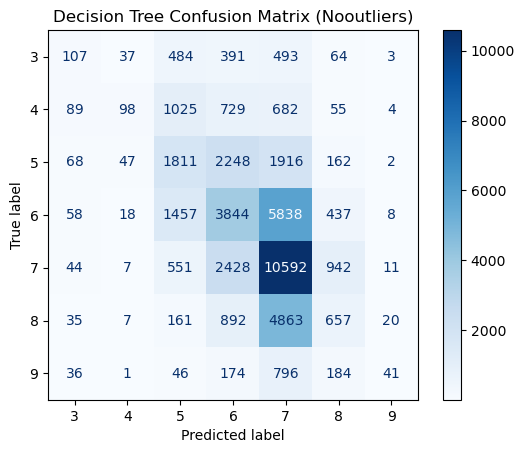

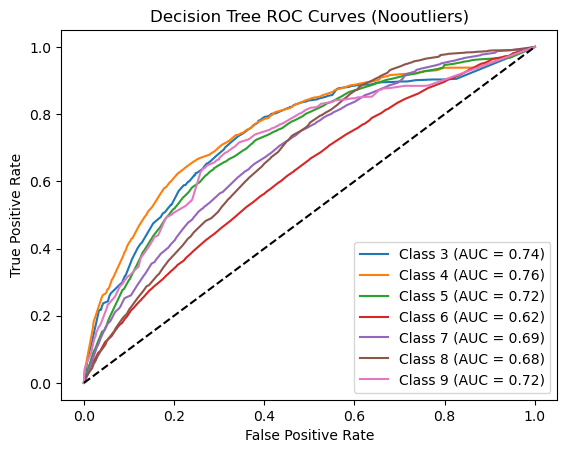

In [7]:
# =============================================================================
# PART 2: Decision Tree Classifier with Normalization & Robust Hyperparameter Tuning
# (For the new target: groupedRating, using the nooutliers dataset)
# =============================================================================

# --- Step C: Hyperparameter Tuning for Decision Tree using RandomizedSearchCV ---
param_grid_dt = {
    'max_depth': list(np.arange(2, 10)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_dt_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_dt_nooutliers.fit(X_train_scaled_nooutliers, y_train_nooutliers)

print("\nBest hyperparameters for DT (Nooutliers):", random_search_dt_nooutliers.best_params_)
print("Best cross-validated score for DT (Nooutliers):", random_search_dt_nooutliers.best_score_)

# Set best_params_dt to those found by random search
best_params_dt_nooutliers = random_search_dt_nooutliers.best_params_

# --- Step D: Train and Evaluate the Final Decision Tree Model ---
best_dt_nooutliers = DecisionTreeClassifier(**best_params_dt_nooutliers, random_state=42)
best_dt_nooutliers.fit(X_train_scaled_nooutliers, y_train_nooutliers)

# Evaluate the final model on the test set
y_pred_dt_nooutliers = best_dt_nooutliers.predict(X_test_scaled_nooutliers)
print("\nDecision Tree Classifier Report (Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_dt_nooutliers))

# --- Step E: Plot Confusion Matrix ---
cm_dt_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_dt_nooutliers)
disp_dt_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_dt_nooutliers, display_labels=best_dt_nooutliers.classes_)
disp_dt_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Nooutliers)")
plt.show()

# --- Step F: ROC Curve Evaluation ---
classes_dt_nooutliers = best_dt_nooutliers.classes_
y_test_dt_bin_nooutliers = label_binarize(y_test_nooutliers, classes=classes_dt_nooutliers)
y_score_dt_nooutliers = best_dt_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_dt_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_nooutliers[:, i], y_score_dt_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

---

### 2) imbalanced learning ML models execution

### 2.1) UnderSampling

### 2.2.1) Random UnderSampling

Class distribution after RUS (Preprocessed):
3    3000
4    3000
5    3000
6    3000
7    3000
8    3000
9    3000
Name: count, dtype: int64


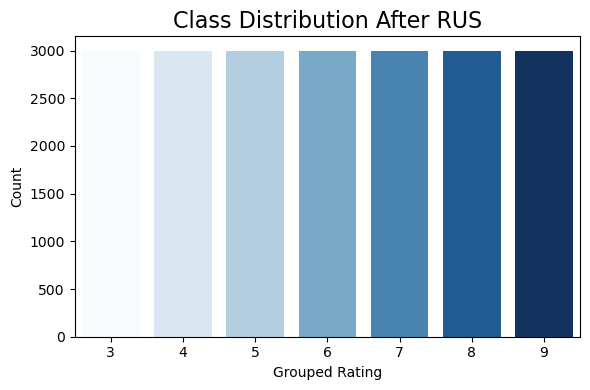


Best hyperparameters for DT (Preprocessed): {'min_samples_split': 50, 'min_samples_leaf': 10, 'max_depth': 9, 'criterion': 'entropy'}
Best cross-validated score for DT (Preprocessed): 0.3140714285714286

Decision Tree Classifier Report (After RUS - Preprocessed):
              precision    recall  f1-score   support

           3       0.10      0.36      0.15      1585
           4       0.17      0.39      0.24      2688
           5       0.29      0.24      0.26      6279
           6       0.36      0.14      0.20     11696
           7       0.51      0.36      0.42     14657
           8       0.24      0.26      0.25      6677
           9       0.08      0.35      0.13      1278

    accuracy                           0.27     44860
   macro avg       0.25      0.30      0.24     44860
weighted avg       0.35      0.27      0.29     44860



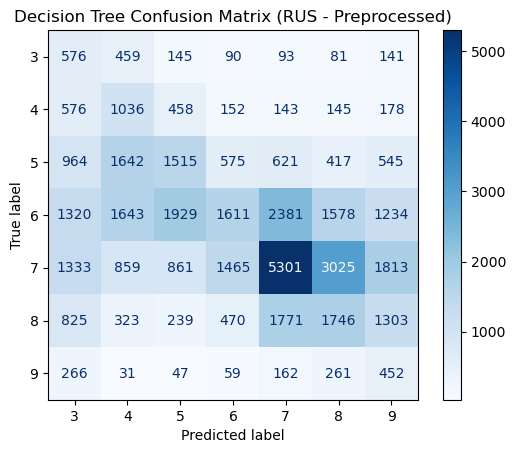

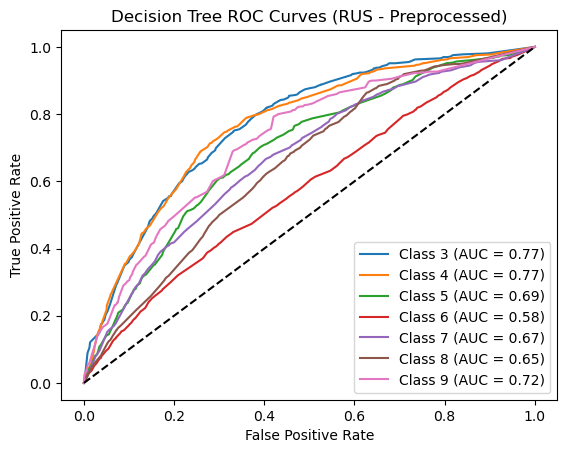

In [8]:
# =============================================================================
# Handling Class Imbalance with Random Undersampling (RUS) for Preprocessed Dataset
# =============================================================================
rus = RandomUnderSampler(random_state=42)
X_res_rus_preprocessed, y_res_rus_preprocessed = rus.fit_resample(X_train_scaled_preprocessed, y_train_preprocessed)

# ----- Plot Undersampled Target Distribution -----
print("Class distribution after RUS (Preprocessed):")
print(pd.Series(y_res_rus_preprocessed).value_counts())
target_counts_after = pd.Series(y_res_rus_preprocessed).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_after.index, y=target_counts_after.values, hue=target_counts_after.index, palette='Blues', legend=False)
plt.title("Class Distribution After RUS", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Hyperparameter Tuning using RandomizedSearchCV on RUS Data (Preprocessed)
# =============================================================================
param_grid_dt = {
    'max_depth': [None] + list(np.arange(2, 10)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_dt = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_dt.fit(X_res_rus_preprocessed, y_res_rus_preprocessed)
best_params_dt = random_search_dt.best_params_
print("\nBest hyperparameters for DT (Preprocessed):", best_params_dt)
print("Best cross-validated score for DT (Preprocessed):", random_search_dt.best_score_)

# =============================================================================
# Train & Evaluate Decision Tree Classifier After RUS with Best Parameters (Preprocessed)
# =============================================================================
best_dt_rus_preprocessed = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_rus_preprocessed.fit(X_res_rus_preprocessed, y_res_rus_preprocessed)

# Predict on the test set
y_pred_dt_rus_preprocessed = best_dt_rus_preprocessed.predict(X_test_scaled_preprocessed)
print("\nDecision Tree Classifier Report (After RUS - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_dt_rus_preprocessed))

# Plot Confusion Matrix
cm_rus_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_dt_rus_preprocessed)
disp_rus_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_rus_preprocessed, display_labels=best_dt_rus_preprocessed.classes_)
disp_rus_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (RUS - Preprocessed)")
plt.show()

# =============================================================================
# ROC Curve Evaluation for the RUS Model (Preprocessed)
# =============================================================================
classes_rus = best_dt_rus_preprocessed.classes_
y_test_dt_bin_preprocessed = label_binarize(y_test_preprocessed, classes=classes_rus)
y_score_dt_preprocessed = best_dt_rus_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_rus):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_preprocessed[:, i], y_score_dt_preprocessed[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (RUS - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

Class distribution after RUS (Nooutliers):
3    2994
4    2994
5    2994
6    2994
7    2994
8    2994
9    2994
Name: count, dtype: int64


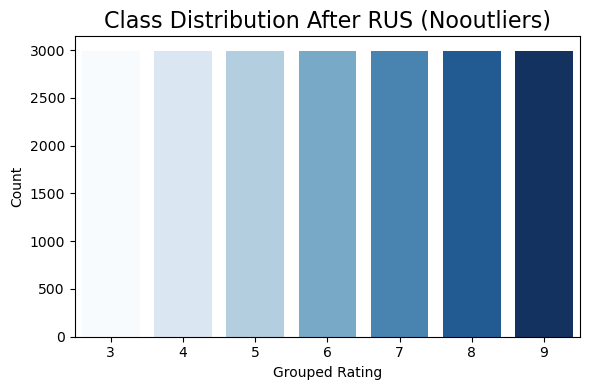


Best hyperparameters for DT (Nooutliers): {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 8, 'criterion': 'entropy'}
Best cross-validated score for DT (Nooutliers): 0.308807985031538

Decision Tree Classifier Report (After RUS - Nooutliers):
              precision    recall  f1-score   support

           3       0.11      0.30      0.16      1579
           4       0.15      0.46      0.22      2682
           5       0.28      0.13      0.17      6254
           6       0.38      0.13      0.19     11660
           7       0.49      0.25      0.34     14575
           8       0.22      0.33      0.26      6635
           9       0.06      0.41      0.11      1278

    accuracy                           0.23     44663
   macro avg       0.24      0.29      0.21     44663
weighted avg       0.35      0.23      0.24     44663



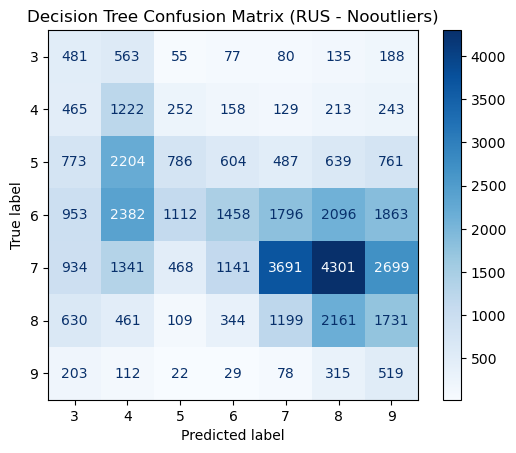

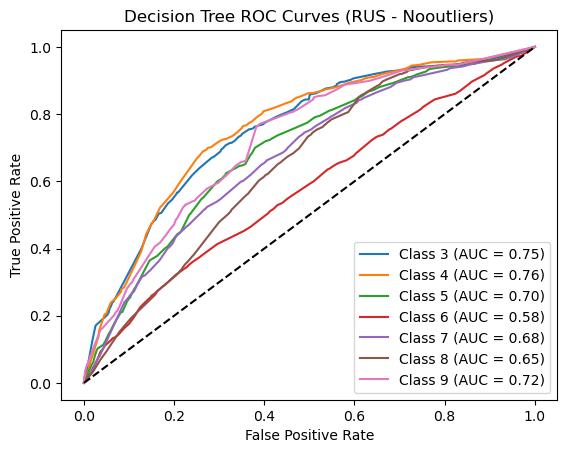

In [9]:
# =============================================================================
# Handling Class Imbalance with Random Undersampling (RUS) for Nooutliers Dataset
# =============================================================================
rus_nooutliers = RandomUnderSampler(random_state=42)
X_res_rus_nooutliers, y_res_rus_nooutliers = rus_nooutliers.fit_resample(X_train_scaled_nooutliers, y_train_nooutliers)

# ----- Plot Undersampled Target Distribution -----
print("Class distribution after RUS (Nooutliers):")
print(pd.Series(y_res_rus_nooutliers).value_counts())
target_counts_after_nooutliers = pd.Series(y_res_rus_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_after_nooutliers.index, y=target_counts_after_nooutliers.values, hue=target_counts_after_nooutliers.index, palette='Blues', legend=False)
plt.title("Class Distribution After RUS (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Hyperparameter Tuning using RandomizedSearchCV on RUS Data (Nooutliers)
# =============================================================================
param_grid_dt = {
    'max_depth': [None] + list(np.arange(2, 10)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_dt_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_dt_nooutliers.fit(X_res_rus_nooutliers, y_res_rus_nooutliers)
best_params_dt_nooutliers = random_search_dt_nooutliers.best_params_
print("\nBest hyperparameters for DT (Nooutliers):", best_params_dt_nooutliers)
print("Best cross-validated score for DT (Nooutliers):", random_search_dt_nooutliers.best_score_)

# =============================================================================
# Train & Evaluate Decision Tree Classifier After RUS with Best Parameters (Nooutliers)
# =============================================================================
best_dt_rus_nooutliers = DecisionTreeClassifier(**best_params_dt_nooutliers, random_state=42)
best_dt_rus_nooutliers.fit(X_res_rus_nooutliers, y_res_rus_nooutliers)

# Predict on the test set
y_pred_dt_rus_nooutliers = best_dt_rus_nooutliers.predict(X_test_scaled_nooutliers)
print("\nDecision Tree Classifier Report (After RUS - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_dt_rus_nooutliers))

# Plot Confusion Matrix
cm_rus_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_dt_rus_nooutliers)
disp_rus_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_rus_nooutliers, display_labels=best_dt_rus_nooutliers.classes_)
disp_rus_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (RUS - Nooutliers)")
plt.show()

# =============================================================================
# ROC Curve Evaluation for the RUS Model (Nooutliers)
# =============================================================================
classes_rus_nooutliers = best_dt_rus_nooutliers.classes_
y_test_dt_bin_nooutliers = label_binarize(y_test_nooutliers, classes=classes_rus_nooutliers)
y_score_dt_nooutliers = best_dt_rus_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_rus_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_nooutliers[:, i], y_score_dt_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (RUS - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.2.2) Tomek Links

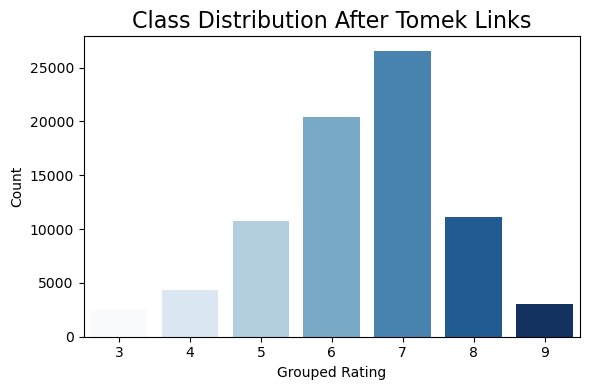


Best hyperparameters for DT after Tomek Links (Preprocessed): {'min_samples_split': 50, 'min_samples_leaf': 5, 'max_depth': 11, 'criterion': 'entropy'}
Best cross-validated score for DT (Preprocessed): 0.41594818324047755

Decision Tree Classifier Report (After Tomek Links - Preprocessed):
              precision    recall  f1-score   support

           3       0.23      0.06      0.10      1585
           4       0.31      0.08      0.13      2688
           5       0.31      0.25      0.28      6279
           6       0.36      0.37      0.37     11696
           7       0.43      0.69      0.53     14657
           8       0.30      0.13      0.18      6677
           9       0.21      0.07      0.10      1278

    accuracy                           0.39     44860
   macro avg       0.31      0.24      0.24     44860
weighted avg       0.36      0.39      0.35     44860



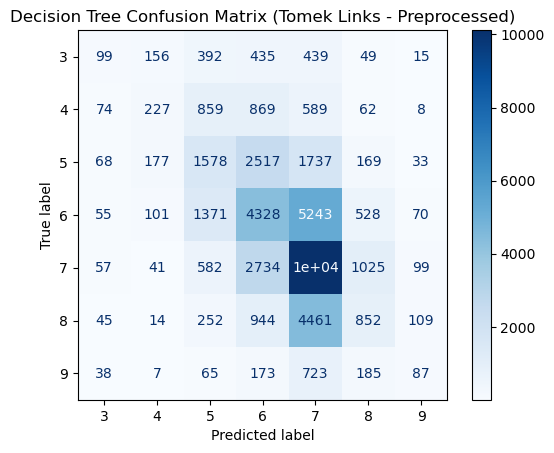

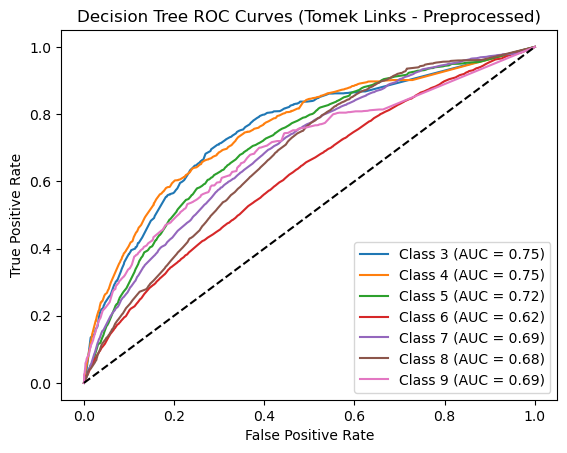

In [10]:
# =============================================================================
# Step 1: Apply Tomek Links Undersampling (Preprocessed Dataset)
# =============================================================================
tl = TomekLinks()
X_res_tl_preprocessed, y_res_tl_preprocessed = tl.fit_resample(X_train_scaled_preprocessed, y_train_preprocessed)

# =============================================================================
# Step 2: Plot Class Distribution After Tomek Links
# =============================================================================
target_counts_tl = pd.Series(y_res_tl_preprocessed).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_tl.index, y=target_counts_tl.values,hue=target_counts_tl.index, palette='Blues', legend=False)
plt.title("Class Distribution After Tomek Links", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning using RandomizedSearchCV on Tomek Links Data
# =============================================================================
param_grid_dt = {
    'max_depth': [None] + list(range(2, 20)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_tl_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_tl_preprocessed.fit(X_res_tl_preprocessed, y_res_tl_preprocessed)
best_params_dt = random_search_tl_preprocessed.best_params_
print("\nBest hyperparameters for DT after Tomek Links (Preprocessed):", best_params_dt)
print("Best cross-validated score for DT (Preprocessed):", random_search_tl_preprocessed.best_score_)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using New Best Parameters
# =============================================================================
best_dt_tl_preprocessed = DecisionTreeClassifier(**best_params_dt, random_state=42)
best_dt_tl_preprocessed.fit(X_res_tl_preprocessed, y_res_tl_preprocessed)

# Predict on the test set
y_pred_tl_preprocessed = best_dt_tl_preprocessed.predict(X_test_scaled_preprocessed)
print("\nDecision Tree Classifier Report (After Tomek Links - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_tl_preprocessed))

# =============================================================================
# Step 5: Plot Confusion Matrix
# =============================================================================
cm_tl_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_tl_preprocessed)
disp_tl_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_tl_preprocessed, display_labels=best_dt_tl_preprocessed.classes_)
disp_tl_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Tomek Links - Preprocessed)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the Model
# =============================================================================
classes_tl = best_dt_tl_preprocessed.classes_
y_test_dt_bin_preprocessed = label_binarize(y_test_preprocessed, classes=classes_tl)
y_score_tl_preprocessed = best_dt_tl_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_tl):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_preprocessed[:, i], y_score_tl_preprocessed[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Tomek Links - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

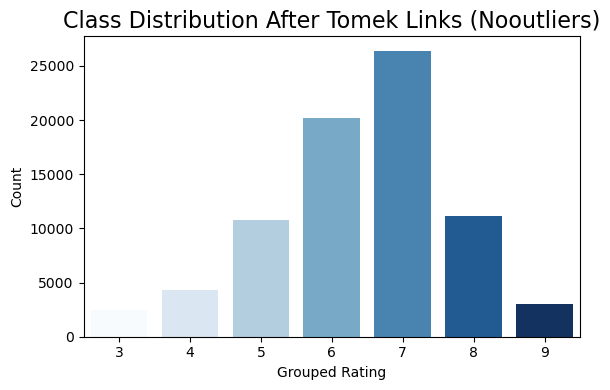


Best hyperparameters for DT after Tomek Links (Nooutliers): {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 9, 'criterion': 'entropy'}
Best cross-validated score for DT (Nooutliers): 0.41255785250596294

Decision Tree Classifier Report (After TL - Nooutliers):
              precision    recall  f1-score   support

           3       0.24      0.06      0.09      1579
           4       0.47      0.04      0.08      2682
           5       0.29      0.28      0.28      6254
           6       0.36      0.35      0.35     11660
           7       0.43      0.69      0.53     14575
           8       0.26      0.11      0.16      6635
           9       0.31      0.06      0.10      1278

    accuracy                           0.38     44663
   macro avg       0.34      0.23      0.23     44663
weighted avg       0.36      0.38      0.34     44663



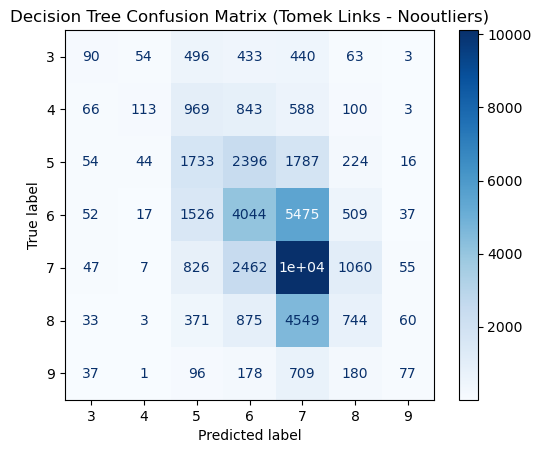

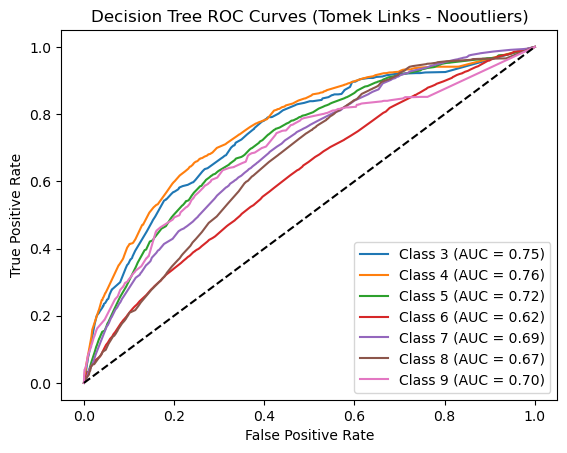

In [11]:
# =============================================================================
# Step 1: Apply Tomek Links Undersampling (Nooutliers Dataset)
# =============================================================================
tl = TomekLinks()
X_res_tl_nooutliers, y_res_tl_nooutliers = tl.fit_resample(X_train_scaled_nooutliers, y_train_nooutliers)

# =============================================================================
# Step 2: Plot Class Distribution After Tomek Links (Nooutliers)
# =============================================================================
target_counts_tl_nooutliers = pd.Series(y_res_tl_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_tl_nooutliers.index, y=target_counts_tl_nooutliers.values, hue=target_counts_tl_nooutliers.index, palette='Blues', legend=False)
plt.title("Class Distribution After Tomek Links (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning using RandomizedSearchCV on TL Data (Nooutliers)
# =============================================================================
param_grid_dt = {
    'max_depth': [None] + list(np.arange(2, 10)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_tl_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_tl_nooutliers.fit(X_res_tl_nooutliers, y_res_tl_nooutliers)
best_params_dt_nooutliers = random_search_tl_nooutliers.best_params_
print("\nBest hyperparameters for DT after Tomek Links (Nooutliers):", best_params_dt_nooutliers)
print("Best cross-validated score for DT (Nooutliers):", random_search_tl_nooutliers.best_score_)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier After TL with Best Parameters (Nooutliers)
# =============================================================================
best_dt_tl_nooutliers = DecisionTreeClassifier(**best_params_dt_nooutliers, random_state=42)
best_dt_tl_nooutliers.fit(X_res_tl_nooutliers, y_res_tl_nooutliers)

# Predict on the test set
y_pred_tl_nooutliers = best_dt_tl_nooutliers.predict(X_test_scaled_nooutliers)
print("\nDecision Tree Classifier Report (After TL - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_tl_nooutliers))

# =============================================================================
# Step 5: Plot Confusion Matrix (Nooutliers)
# =============================================================================
cm_tl_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_tl_nooutliers)
disp_tl_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_tl_nooutliers, display_labels=best_dt_tl_nooutliers.classes_)
disp_tl_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Tomek Links - Nooutliers)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the TL Model (Nooutliers)
# =============================================================================
classes_tl_nooutliers = best_dt_tl_nooutliers.classes_
y_test_dt_bin_nooutliers = label_binarize(y_test_nooutliers, classes=classes_tl_nooutliers)
y_score_tl_nooutliers = best_dt_tl_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_tl_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_nooutliers[:, i], y_score_tl_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Tomek Links - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.2.3) Edited Nearest Neighbors

Class distribution after ENN (Preprocessed):
7    5925
9    3000
6    2292
8    1201
5     761
4     202
3     165
Name: count, dtype: int64


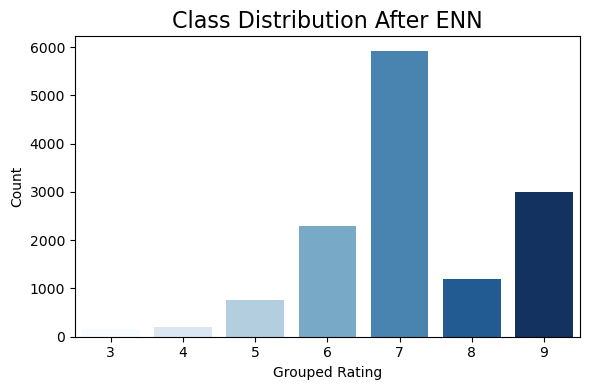


Best hyperparameters for DT after ENN (Preprocessed): {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'entropy'}

Decision Tree Classifier Report (After ENN - Preprocessed):
              precision    recall  f1-score   support

           3       0.18      0.13      0.15      1585
           4       0.26      0.12      0.17      2688
           5       0.33      0.22      0.26      6279
           6       0.35      0.32      0.34     11696
           7       0.49      0.47      0.48     14657
           8       0.28      0.10      0.15      6677
           9       0.06      0.54      0.11      1278

    accuracy                           0.31     44860
   macro avg       0.28      0.27      0.24     44860
weighted avg       0.36      0.31      0.32     44860



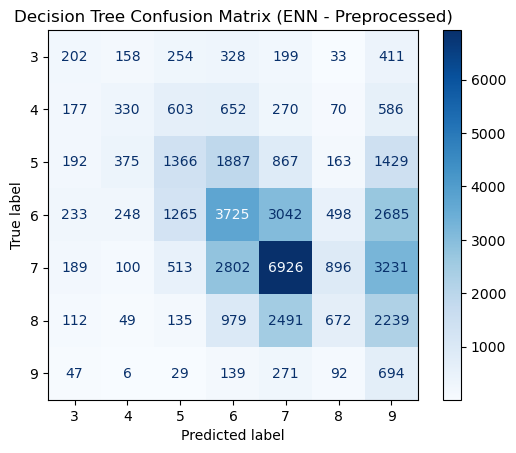

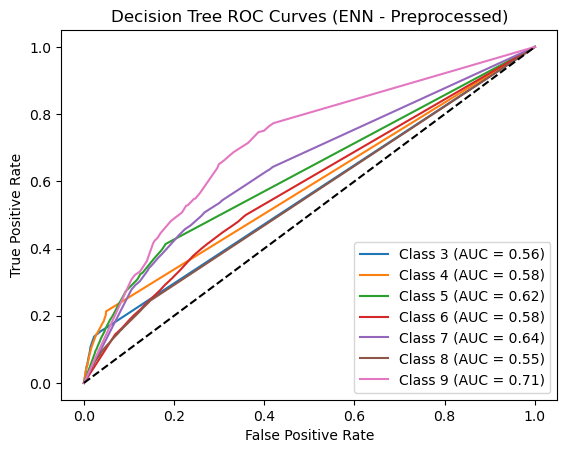

In [12]:
# =============================================================================
# Step 1: Apply Edited Nearest Neighbors (ENN) Undersampling (Preprocessed Dataset)
# =============================================================================
enn = EditedNearestNeighbours()
X_res_enn_preprocessed, y_res_enn_preprocessed = enn.fit_resample(X_train_scaled_preprocessed, y_train_preprocessed)

# =============================================================================
# Step 2: Plot Class Distribution After ENN
# =============================================================================
print("Class distribution after ENN (Preprocessed):")
print(pd.Series(y_res_enn_preprocessed).value_counts())
target_counts_enn = pd.Series(y_res_enn_preprocessed).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_enn.index, y=target_counts_enn.values, hue=target_counts_enn.index, palette='Blues', legend=False)
plt.title("Class Distribution After ENN", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV on ENN Data (Preprocessed)
# =============================================================================
param_grid_dt = {
    'max_depth': [None] + list(np.arange(2, 10)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': [ 'entropy']
}

random_search_enn_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_enn_preprocessed.fit(X_res_enn_preprocessed, y_res_enn_preprocessed)
best_params_enn = random_search_enn_preprocessed.best_params_
print("\nBest hyperparameters for DT after ENN (Preprocessed):", best_params_enn)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using ENN Data (Preprocessed)
# =============================================================================
best_dt_enn_preprocessed = DecisionTreeClassifier(**best_params_enn, random_state=42)
best_dt_enn_preprocessed.fit(X_res_enn_preprocessed, y_res_enn_preprocessed)

# Predict on the test set
y_pred_enn_preprocessed = best_dt_enn_preprocessed.predict(X_test_scaled_preprocessed)
print("\nDecision Tree Classifier Report (After ENN - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_enn_preprocessed))

# =============================================================================
# Step 5: Plot Confusion Matrix (Preprocessed)
# =============================================================================
cm_enn_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_enn_preprocessed)
disp_enn_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_enn_preprocessed, display_labels=best_dt_enn_preprocessed.classes_)
disp_enn_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (ENN - Preprocessed)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the ENN Model (Preprocessed)
# =============================================================================
classes_enn = best_dt_enn_preprocessed.classes_
y_test_dt_bin_preprocessed = label_binarize(y_test_preprocessed, classes=classes_enn)
y_score_enn_preprocessed = best_dt_enn_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_enn):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_preprocessed[:, i], y_score_enn_preprocessed[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (ENN - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

Class distribution after ENN (Nooutliers):
7    5895
9    2994
6    2282
8    1217
5     769
4     201
3     171
Name: count, dtype: int64


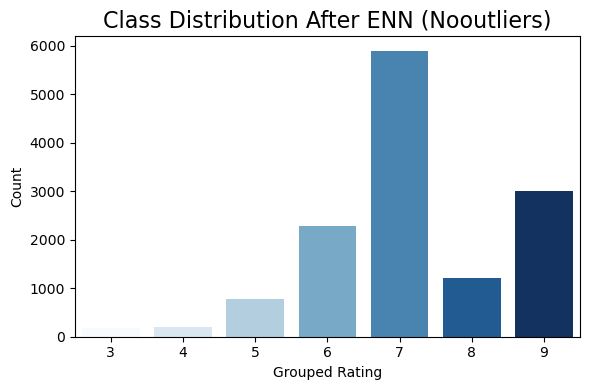


Best hyperparameters for DT after ENN (Nooutliers): {'min_samples_split': 50, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score for DT (Nooutliers): 0.6350801463988426

Decision Tree Classifier Report (After ENN - Nooutliers):
              precision    recall  f1-score   support

           3       0.17      0.07      0.10      1579
           4       0.36      0.07      0.12      2682
           5       0.33      0.23      0.27      6254
           6       0.34      0.34      0.34     11660
           7       0.50      0.46      0.47     14575
           8       0.28      0.10      0.14      6635
           9       0.07      0.65      0.12      1278

    accuracy                           0.31     44663
   macro avg       0.29      0.27      0.22     44663
weighted avg       0.37      0.31      0.32     44663



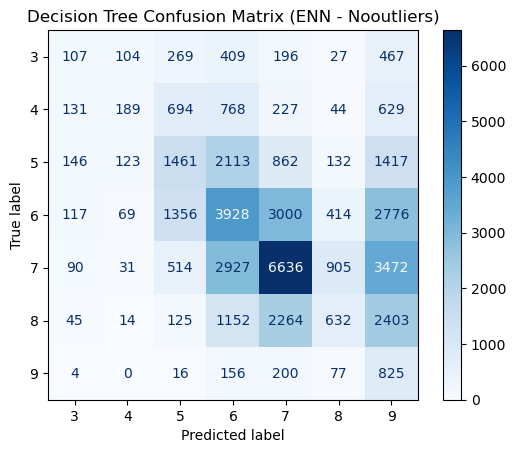

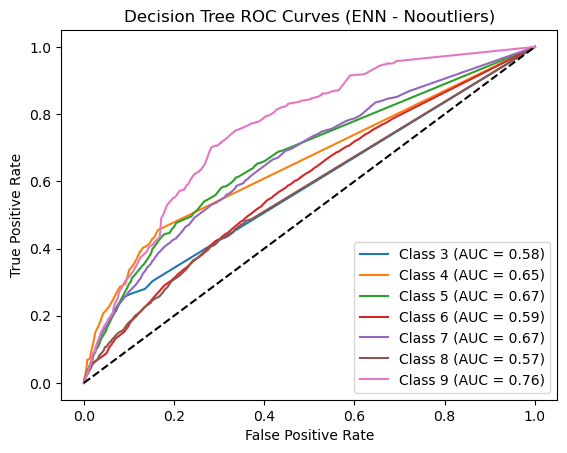

In [13]:
# =============================================================================
# Step 1: Apply Edited Nearest Neighbors (ENN) Undersampling (Nooutliers Dataset)
# =============================================================================
enn_nooutliers = EditedNearestNeighbours()
X_res_enn_nooutliers, y_res_enn_nooutliers = enn_nooutliers.fit_resample(X_train_scaled_nooutliers, y_train_nooutliers)

# =============================================================================
# Step 2: Plot Class Distribution After ENN (Nooutliers)
# =============================================================================
print("Class distribution after ENN (Nooutliers):")
print(pd.Series(y_res_enn_nooutliers).value_counts())
target_counts_enn_nooutliers = pd.Series(y_res_enn_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_enn_nooutliers.index, y=target_counts_enn_nooutliers.values, hue=target_counts_enn_nooutliers.index, palette='Blues', legend=False)
plt.title("Class Distribution After ENN (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning using RandomizedSearchCV on ENN Data (Nooutliers)
# =============================================================================
param_grid_dt = {
    'max_depth': [None] + list(np.arange(2, 10)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_enn_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_enn_nooutliers.fit(X_res_enn_nooutliers, y_res_enn_nooutliers)
best_params_dt_nooutliers = random_search_enn_nooutliers.best_params_
print("\nBest hyperparameters for DT after ENN (Nooutliers):", best_params_dt_nooutliers)
print("Best cross-validated score for DT (Nooutliers):", random_search_enn_nooutliers.best_score_)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using ENN Data (Nooutliers)
# =============================================================================
best_dt_enn_nooutliers = DecisionTreeClassifier(**best_params_dt_nooutliers, random_state=42)
best_dt_enn_nooutliers.fit(X_res_enn_nooutliers, y_res_enn_nooutliers)

# Predict on the test set
y_pred_enn_nooutliers = best_dt_enn_nooutliers.predict(X_test_scaled_nooutliers)
print("\nDecision Tree Classifier Report (After ENN - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_enn_nooutliers))

# =============================================================================
# Step 5: Plot Confusion Matrix (Nooutliers)
# =============================================================================
cm_enn_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_enn_nooutliers)
disp_enn_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_enn_nooutliers, display_labels=best_dt_enn_nooutliers.classes_)
disp_enn_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (ENN - Nooutliers)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the ENN Model (Nooutliers)
# =============================================================================
classes_enn_nooutliers = best_dt_enn_nooutliers.classes_
y_test_dt_bin_nooutliers = label_binarize(y_test_nooutliers, classes=classes_enn_nooutliers)
y_score_enn_nooutliers = best_dt_enn_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_enn_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_nooutliers[:, i], y_score_enn_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (ENN - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.2.4) Condensed Nearest Neighbors

In [14]:
"""
# =============================================================================
# Step 1: Apply Condensed Nearest Neighbours (CNN) Undersampling
# =============================================================================
cnn = CondensedNearestNeighbour(random_state=42)
X_res_cnn, y_res_cnn = cnn.fit_resample(X_train_dt_scaled, y_train_dt)

# =============================================================================
# Step 2: Plot Class Distribution After CNN
# =============================================================================
target_counts_cnn = pd.Series(y_res_cnn).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_cnn.index, y=target_counts_cnn.values, hue=target_counts_cnn.index, palette='Blues', legend=False)
plt.title("Class Distribution After Condensed Nearest Neighbours", fontsize=16)
plt.xlabel("Grouped Title Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV
# =============================================================================
"""
"""
param_grid_dt = {
    'max_depth': [None] + list(range(2, 20)),
    'min_samples_split': [10, 20, 50, 100],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['gini', 'entropy']
}

random_search_cnn = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_cnn.fit(X_res_cnn, y_res_cnn)
best_params_cnn = random_search_cnn.best_params_
print("\nBest hyperparameters for DT after Condensed Nearest Neighbours:", best_params_cnn)
"""
"""

best_params_cnn = {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 14, 'criterion': 'entropy'}

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using CNN Data
# =============================================================================
best_dt_cnn = DecisionTreeClassifier(**best_params_cnn, random_state=42)
best_dt_cnn.fit(X_res_cnn, y_res_cnn)
y_pred_dt_cnn = best_dt_cnn.predict(X_test_dt_scaled)

print("\nDecision Tree Classifier Report (After CNN):")
print(classification_report(y_test_dt, y_pred_dt_cnn))

# =============================================================================
# Step 5: Plot Confusion Matrix
# =============================================================================
cm_cnn = confusion_matrix(y_test_dt, y_pred_dt_cnn)
disp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=best_dt_cnn.classes_)
disp_cnn.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (CNN)")
plt.show()

# =============================================================================
# Step 6: Plot ROC Curves for the CNN Model
# =============================================================================
# Binarize the true labels for multiclass ROC computation
classes_cnn = best_dt_cnn.classes_
y_test_bin_cnn = label_binarize(y_test_dt, classes=classes_cnn)
y_score_cnn = best_dt_cnn.predict_proba(X_test_dt_scaled)

plt.figure()
for i, cls in enumerate(classes_cnn):
    fpr, tpr, _ = roc_curve(y_test_bin_cnn[:, i], y_score_cnn[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (CNN)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()
"""

'\n\nbest_params_cnn = {\'min_samples_split\': 10, \'min_samples_leaf\': 5, \'max_depth\': 14, \'criterion\': \'entropy\'}\n\n# =============================================================================\n# Step 4: Train & Evaluate Decision Tree Classifier Using CNN Data\n# =============================================================================\nbest_dt_cnn = DecisionTreeClassifier(**best_params_cnn, random_state=42)\nbest_dt_cnn.fit(X_res_cnn, y_res_cnn)\ny_pred_dt_cnn = best_dt_cnn.predict(X_test_dt_scaled)\n\nprint("\nDecision Tree Classifier Report (After CNN):")\nprint(classification_report(y_test_dt, y_pred_dt_cnn))\n\n# =============================================================================\n# Step 5: Plot Confusion Matrix\n# =============================================================================\ncm_cnn = confusion_matrix(y_test_dt, y_pred_dt_cnn)\ndisp_cnn = ConfusionMatrixDisplay(confusion_matrix=cm_cnn, display_labels=best_dt_cnn.classes_)\ndisp_cnn.plot(

### 2.2.5) Cluster Centroids

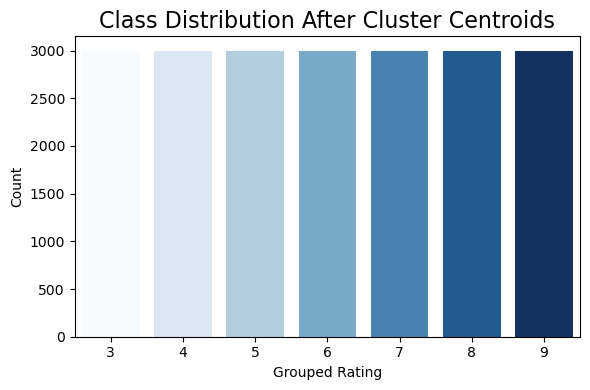


Best hyperparameters for DT after Cluster Centroids (Preprocessed): {'min_samples_split': 50, 'min_samples_leaf': 5, 'max_depth': 9, 'criterion': 'entropy'}

Decision Tree Classifier Report (After Cluster Centroids - Preprocessed):
              precision    recall  f1-score   support

           3       0.08      0.54      0.14      1585
           4       0.12      0.22      0.16      2688
           5       0.26      0.12      0.17      6279
           6       0.40      0.05      0.10     11696
           7       0.58      0.10      0.16     14657
           8       0.21      0.12      0.15      6677
           9       0.05      0.74      0.10      1278

    accuracy                           0.13     44860
   macro avg       0.24      0.27      0.14     44860
weighted avg       0.37      0.13      0.14     44860



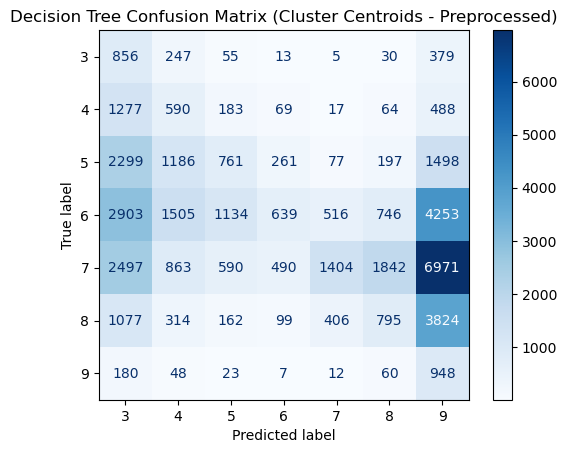

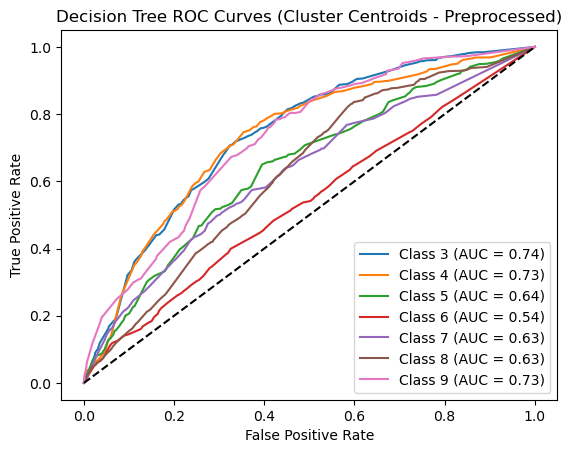

In [15]:
# =============================================================================
# Step 1: Apply Cluster Centroids Undersampling using MiniBatchKMeans (Preprocessed Dataset)
# =============================================================================
cc_preprocessed = ClusterCentroids(estimator=MiniBatchKMeans(n_init=1, random_state=42), random_state=42)
X_res_cc_preprocessed, y_res_cc_preprocessed = cc_preprocessed.fit_resample(X_train_scaled_preprocessed, y_train_preprocessed)

# =============================================================================
# Step 2: Plot Class Distribution After Cluster Centroids (Preprocessed)
# =============================================================================
target_counts_cc = pd.Series(y_res_cc_preprocessed).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_cc.index, y=target_counts_cc.values, hue=target_counts_cc.index, palette='Blues', legend=False)
plt.title("Class Distribution After Cluster Centroids", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV (Preprocessed)
# =============================================================================
param_grid_dt = {
    'max_depth': [None] + list(np.arange(2, 10)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_cc_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_cc_preprocessed.fit(X_res_cc_preprocessed, y_res_cc_preprocessed)
best_params_cc_preprocessed = random_search_cc_preprocessed.best_params_
print("\nBest hyperparameters for DT after Cluster Centroids (Preprocessed):", best_params_cc_preprocessed)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using Cluster Centroids Data (Preprocessed)
# =============================================================================
best_dt_cc_preprocessed = DecisionTreeClassifier(**best_params_cc_preprocessed, random_state=42)
best_dt_cc_preprocessed.fit(X_res_cc_preprocessed, y_res_cc_preprocessed)
y_pred_dt_cc_preprocessed = best_dt_cc_preprocessed.predict(X_test_scaled_preprocessed)

print("\nDecision Tree Classifier Report (After Cluster Centroids - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_dt_cc_preprocessed))

# =============================================================================
# Step 5: Plot Confusion Matrix (Preprocessed)
# =============================================================================
cm_cc_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_dt_cc_preprocessed)
disp_cc_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_cc_preprocessed, display_labels=best_dt_cc_preprocessed.classes_)
disp_cc_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Cluster Centroids - Preprocessed)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the Cluster Centroids Model (Preprocessed)
# =============================================================================
classes_cc = best_dt_cc_preprocessed.classes_
y_test_dt_bin_preprocessed = label_binarize(y_test_preprocessed, classes=classes_cc)
y_score_cc_preprocessed = best_dt_cc_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_cc):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_preprocessed[:, i], y_score_cc_preprocessed[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Cluster Centroids - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

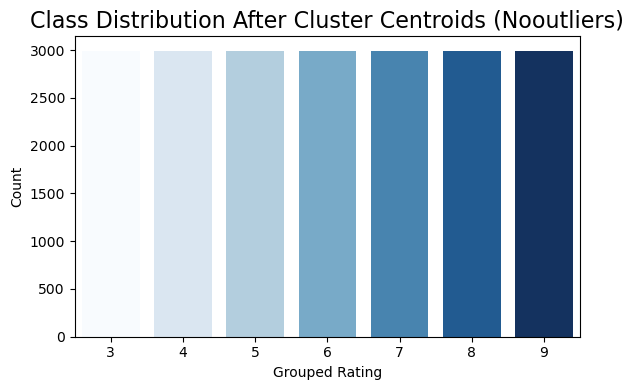


Best hyperparameters for DT after Cluster Centroids (Nooutliers): {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 9, 'criterion': 'entropy'}

Decision Tree Classifier Report (After Cluster Centroids - Nooutliers):
              precision    recall  f1-score   support

           3       0.07      0.56      0.12      1579
           4       0.13      0.24      0.16      2682
           5       0.27      0.13      0.18      6254
           6       0.37      0.05      0.09     11660
           7       0.60      0.06      0.11     14575
           8       0.20      0.17      0.18      6635
           9       0.05      0.65      0.10      1278

    accuracy                           0.13     44663
   macro avg       0.24      0.27      0.14     44663
weighted avg       0.37      0.13      0.13     44663



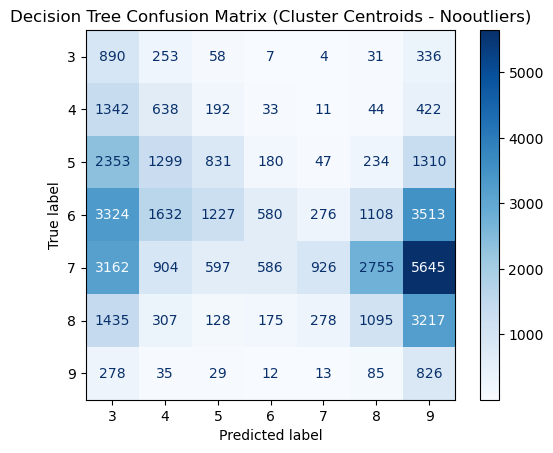

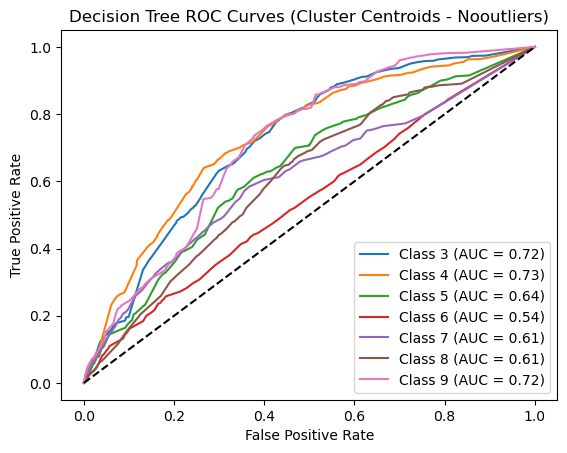

In [16]:
# =============================================================================
# Step 1: Apply Cluster Centroids Undersampling using MiniBatchKMeans (Nooutliers Dataset)
# =============================================================================
cc_nooutliers = ClusterCentroids(estimator=MiniBatchKMeans(n_init=1, random_state=42), random_state=42)
X_res_cc_nooutliers, y_res_cc_nooutliers = cc_nooutliers.fit_resample(X_train_scaled_nooutliers, y_train_nooutliers)

# =============================================================================
# Step 2: Plot Class Distribution After Cluster Centroids (Nooutliers)
# =============================================================================
target_counts_cc_nooutliers = pd.Series(y_res_cc_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_cc_nooutliers.index, y=target_counts_cc_nooutliers.values, hue=target_counts_cc_nooutliers.index, palette='Blues', legend=False)
plt.title("Class Distribution After Cluster Centroids (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV on Cluster Centroids Data (Nooutliers)
# =============================================================================
param_grid_dt = {
    'max_depth': [None] + list(np.arange(2, 10)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_cc_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_cc_nooutliers.fit(X_res_cc_nooutliers, y_res_cc_nooutliers)
best_params_cc_nooutliers = random_search_cc_nooutliers.best_params_
print("\nBest hyperparameters for DT after Cluster Centroids (Nooutliers):", best_params_cc_nooutliers)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using Cluster Centroids Data (Nooutliers)
# =============================================================================
best_dt_cc_nooutliers = DecisionTreeClassifier(**best_params_cc_nooutliers, random_state=42)
best_dt_cc_nooutliers.fit(X_res_cc_nooutliers, y_res_cc_nooutliers)
y_pred_dt_cc_nooutliers = best_dt_cc_nooutliers.predict(X_test_scaled_nooutliers)

print("\nDecision Tree Classifier Report (After Cluster Centroids - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_dt_cc_nooutliers))

# =============================================================================
# Step 5: Plot Confusion Matrix (Nooutliers)
# =============================================================================
cm_cc_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_dt_cc_nooutliers)
disp_cc_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_cc_nooutliers, display_labels=best_dt_cc_nooutliers.classes_)
disp_cc_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Cluster Centroids - Nooutliers)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the Cluster Centroids Model (Nooutliers)
# =============================================================================
classes_cc_nooutliers = best_dt_cc_nooutliers.classes_
y_test_dt_bin_nooutliers = label_binarize(y_test_nooutliers, classes=classes_cc_nooutliers)
y_score_cc_nooutliers = best_dt_cc_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_cc_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_nooutliers[:, i], y_score_cc_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Cluster Centroids - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.2) OverSampling

### 2.2.1) Random Oversampling

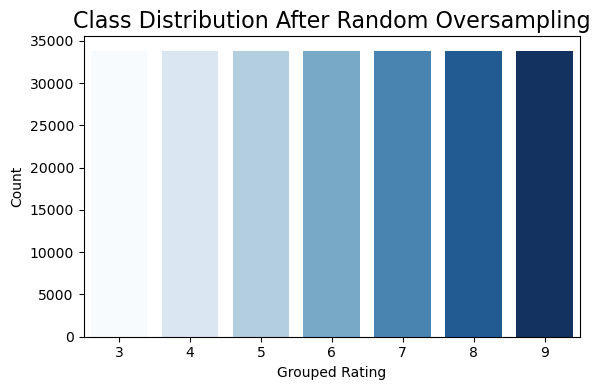


Best hyperparameters for DT after Random Oversampling (Preprocessed): {'min_samples_split': 20, 'min_samples_leaf': 10, 'max_depth': 19, 'criterion': 'entropy'}

Decision Tree Classifier Report (After Random Oversampling - Preprocessed):
              precision    recall  f1-score   support

           3       0.10      0.28      0.15      1585
           4       0.14      0.30      0.19      2688
           5       0.24      0.29      0.26      6279
           6       0.38      0.24      0.29     11696
           7       0.52      0.31      0.39     14657
           8       0.25      0.31      0.28      6677
           9       0.08      0.22      0.12      1278

    accuracy                           0.28     44860
   macro avg       0.25      0.28      0.24     44860
weighted avg       0.36      0.28      0.30     44860



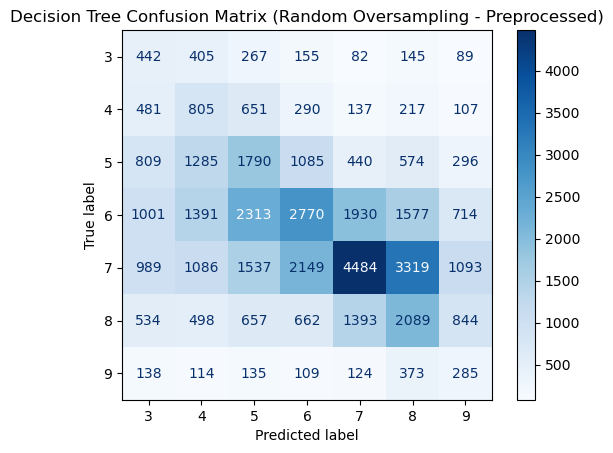

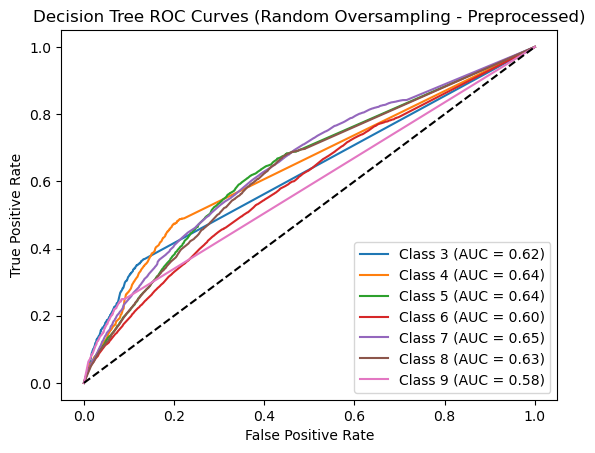

In [17]:
# =============================================================================
# Step 1: Apply Random Oversampling (ROS) for Preprocessed Dataset
# =============================================================================
ros = RandomOverSampler(random_state=42)
X_res_ros_preprocessed, y_res_ros_preprocessed = ros.fit_resample(X_train_scaled_preprocessed, y_train_preprocessed)

# =============================================================================
# Step 2: Plot Class Distribution After Random Oversampling (Preprocessed)
# =============================================================================
target_counts_ros_preprocessed = pd.Series(y_res_ros_preprocessed).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_ros_preprocessed.index, y=target_counts_ros_preprocessed.values, hue=target_counts_ros_preprocessed.index, palette='Blues', legend=False)
plt.title("Class Distribution After Random Oversampling", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV on ROS Data (Preprocessed)
# =============================================================================
param_grid_dt = {
    'max_depth': [None] + list(range(2, 20)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_ros_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_ros_preprocessed.fit(X_res_ros_preprocessed, y_res_ros_preprocessed)
best_params_ros_preprocessed = random_search_ros_preprocessed.best_params_
print("\nBest hyperparameters for DT after Random Oversampling (Preprocessed):", best_params_ros_preprocessed)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using ROS Data (Preprocessed)
# =============================================================================
best_dt_ros_preprocessed = DecisionTreeClassifier(**best_params_ros_preprocessed, random_state=42)
best_dt_ros_preprocessed.fit(X_res_ros_preprocessed, y_res_ros_preprocessed)

# Predict on the test set
y_pred_ros_preprocessed = best_dt_ros_preprocessed.predict(X_test_scaled_preprocessed)
print("\nDecision Tree Classifier Report (After Random Oversampling - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_ros_preprocessed))

# =============================================================================
# Step 5: Plot Confusion Matrix (Preprocessed)
# =============================================================================
cm_ros_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_ros_preprocessed)
disp_ros_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_ros_preprocessed, display_labels=best_dt_ros_preprocessed.classes_)
disp_ros_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Random Oversampling - Preprocessed)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the ROS Model (Preprocessed)
# =============================================================================
classes_ros_preprocessed = best_dt_ros_preprocessed.classes_
y_test_bin_ros_preprocessed = label_binarize(y_test_preprocessed, classes=classes_ros_preprocessed)
y_score_ros_preprocessed = best_dt_ros_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_ros_preprocessed):
    fpr, tpr, _ = roc_curve(y_test_bin_ros_preprocessed[:, i], y_score_ros_preprocessed[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Random Oversampling - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

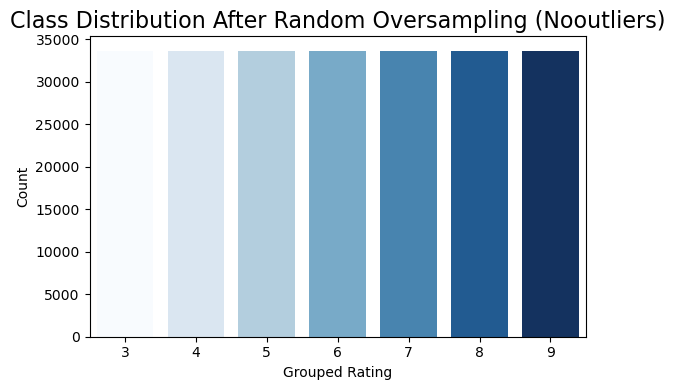


Best hyperparameters for DT after Random Oversampling (Nooutliers): {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': None, 'criterion': 'entropy'}
Best cross-validated score for DT (Nooutliers): 0.701204907913814

Decision Tree Classifier Report (After Random Oversampling - Nooutliers):
              precision    recall  f1-score   support

           3       0.13      0.23      0.17      1579
           4       0.15      0.25      0.19      2682
           5       0.23      0.29      0.26      6254
           6       0.36      0.30      0.33     11660
           7       0.50      0.36      0.42     14575
           8       0.26      0.29      0.27      6635
           9       0.11      0.16      0.13      1278

    accuracy                           0.31     44663
   macro avg       0.25      0.27      0.25     44663
weighted avg       0.34      0.31      0.32     44663



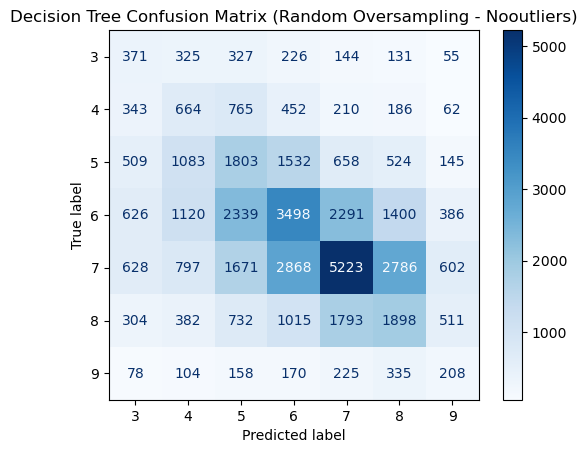

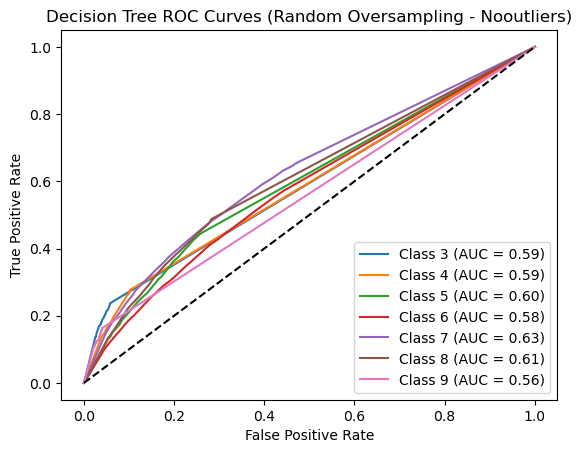

In [18]:
# =============================================================================
# Step 1: Apply Random Oversampling (ROS) for Nooutliers Dataset
# =============================================================================
ros_nooutliers = RandomOverSampler(random_state=42)
X_res_ros_nooutliers, y_res_ros_nooutliers = ros_nooutliers.fit_resample(X_train_scaled_nooutliers, y_train_nooutliers)

# =============================================================================
# Step 2: Plot Class Distribution After Random Oversampling (Nooutliers)
# =============================================================================
target_counts_ros_nooutliers = pd.Series(y_res_ros_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_ros_nooutliers.index, y=target_counts_ros_nooutliers.values, hue=target_counts_ros_nooutliers.index, palette='Blues', legend=False)
plt.title("Class Distribution After Random Oversampling (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV on ROS Data (Nooutliers)
# =============================================================================
param_grid_dt = {
    'max_depth': [None] + list(np.arange(2, 10)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_ros_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_ros_nooutliers.fit(X_res_ros_nooutliers, y_res_ros_nooutliers)
best_params_ros_nooutliers = random_search_ros_nooutliers.best_params_
print("\nBest hyperparameters for DT after Random Oversampling (Nooutliers):", best_params_ros_nooutliers)
print("Best cross-validated score for DT (Nooutliers):", random_search_ros_nooutliers.best_score_)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using ROS Data (Nooutliers)
# =============================================================================
best_dt_ros_nooutliers = DecisionTreeClassifier(**best_params_ros_nooutliers, random_state=42)
best_dt_ros_nooutliers.fit(X_res_ros_nooutliers, y_res_ros_nooutliers)

# Predict on the test set
y_pred_ros_nooutliers = best_dt_ros_nooutliers.predict(X_test_scaled_nooutliers)
print("\nDecision Tree Classifier Report (After Random Oversampling - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_ros_nooutliers))

# =============================================================================
# Step 5: Plot Confusion Matrix (Nooutliers)
# =============================================================================
cm_ros_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_ros_nooutliers)
disp_ros_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_ros_nooutliers, display_labels=best_dt_ros_nooutliers.classes_)
disp_ros_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Random Oversampling - Nooutliers)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the ROS Model (Nooutliers)
# =============================================================================
classes_ros_nooutliers = best_dt_ros_nooutliers.classes_
y_test_dt_bin_ros_nooutliers = label_binarize(y_test_nooutliers, classes=classes_ros_nooutliers)
y_score_ros_nooutliers = best_dt_ros_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_ros_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_ros_nooutliers[:, i], y_score_ros_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Random Oversampling - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.2.2) SMOTE

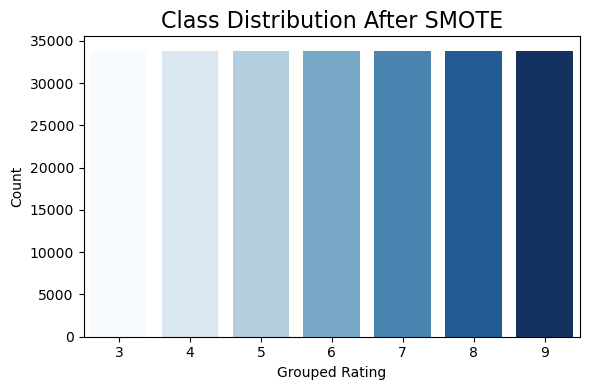


Best hyperparameters for DT after SMOTE (Preprocessed): {'min_samples_split': 10, 'min_samples_leaf': 10, 'max_depth': 9, 'criterion': 'entropy'}

Decision Tree Classifier Report (After SMOTE - Preprocessed):
              precision    recall  f1-score   support

           3       0.10      0.29      0.15      1585
           4       0.21      0.23      0.22      2688
           5       0.29      0.33      0.30      6279
           6       0.37      0.18      0.24     11696
           7       0.51      0.43      0.47     14657
           8       0.23      0.23      0.23      6677
           9       0.09      0.37      0.14      1278

    accuracy                           0.30     44860
   macro avg       0.26      0.30      0.25     44860
weighted avg       0.36      0.30      0.32     44860



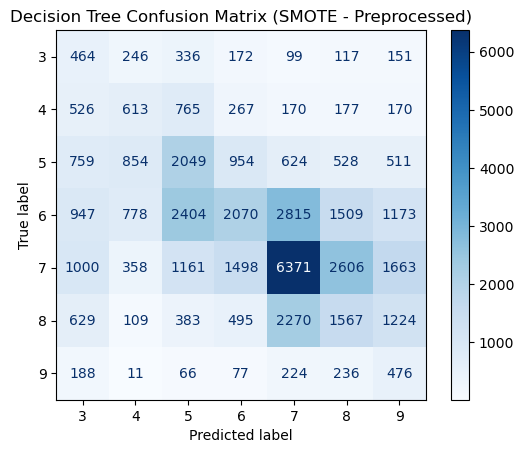

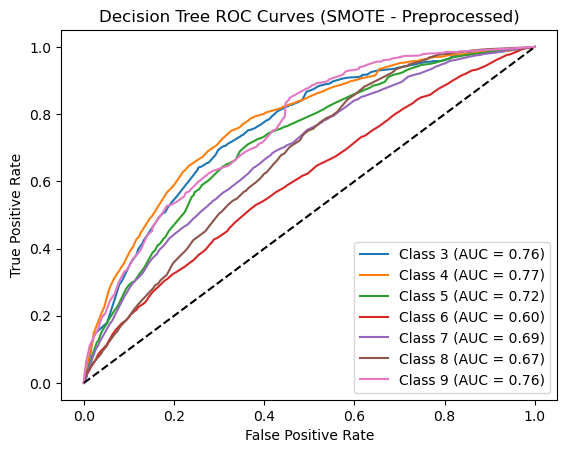

In [19]:
# =============================================================================
# Step 1: Apply SMOTE Oversampling (Preprocessed Dataset)
# =============================================================================
smote = SMOTE(random_state=42)
X_res_smote_preprocessed, y_res_smote_preprocessed = smote.fit_resample(X_train_scaled_preprocessed, y_train_preprocessed)

# =============================================================================
# Step 2: Plot Class Distribution After SMOTE (Preprocessed)
# =============================================================================
target_counts_smote = pd.Series(y_res_smote_preprocessed).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_smote.index, y=target_counts_smote.values, hue=target_counts_smote.index, palette='Blues', legend=False)
plt.title("Class Distribution After SMOTE", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV on SMOTE Data (Preprocessed)
# =============================================================================
param_grid_dt = {
    'max_depth': list(range(2, 10)),
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_smote_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=15,
    scoring='accuracy'
)
random_search_smote_preprocessed.fit(X_res_smote_preprocessed, y_res_smote_preprocessed)
best_params_smote = random_search_smote_preprocessed.best_params_
print("\nBest hyperparameters for DT after SMOTE (Preprocessed):", best_params_smote)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using SMOTE Data (Preprocessed)
# =============================================================================
best_dt_smote_preprocessed = DecisionTreeClassifier(**best_params_smote, random_state=42)
best_dt_smote_preprocessed.fit(X_res_smote_preprocessed, y_res_smote_preprocessed)
y_pred_smote_preprocessed = best_dt_smote_preprocessed.predict(X_test_scaled_preprocessed)

print("\nDecision Tree Classifier Report (After SMOTE - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_smote_preprocessed))

# =============================================================================
# Step 5: Plot Confusion Matrix (Preprocessed)
# =============================================================================
cm_smote = confusion_matrix(y_test_preprocessed, y_pred_smote_preprocessed)
disp_smote = ConfusionMatrixDisplay(confusion_matrix=cm_smote, display_labels=best_dt_smote_preprocessed.classes_)
disp_smote.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (SMOTE - Preprocessed)")
plt.show()

# =============================================================================
# Step 6: Plot ROC Curves for the SMOTE Model (Preprocessed)
# =============================================================================
classes_smote = best_dt_smote_preprocessed.classes_
y_test_bin_smote = label_binarize(y_test_preprocessed, classes=classes_smote)
y_score_smote = best_dt_smote_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_smote):
    fpr, tpr, _ = roc_curve(y_test_bin_smote[:, i], y_score_smote[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (SMOTE - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

# Best hyperparameters for DT after SMOTE (Preprocessed): {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 19, 'criterion': 'entropy'}

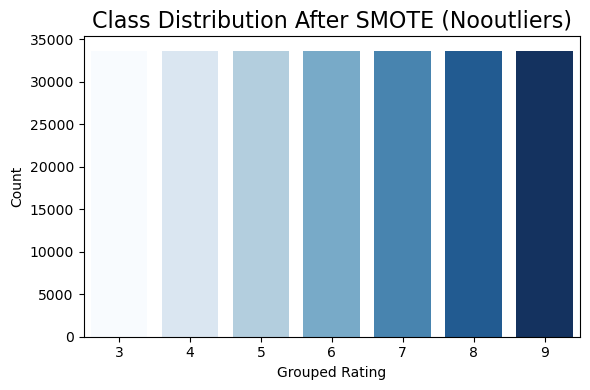


Best hyperparameters for DT after SMOTE (Nooutliers): {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 10, 'criterion': 'entropy'}

Decision Tree Classifier Report (After SMOTE - Nooutliers):
              precision    recall  f1-score   support

           3       0.10      0.24      0.14      1579
           4       0.17      0.30      0.22      2682
           5       0.29      0.29      0.29      6254
           6       0.37      0.21      0.26     11660
           7       0.51      0.39      0.44     14575
           8       0.24      0.23      0.24      6635
           9       0.09      0.41      0.14      1278

    accuracy                           0.29     44663
   macro avg       0.25      0.29      0.25     44663
weighted avg       0.35      0.29      0.31     44663



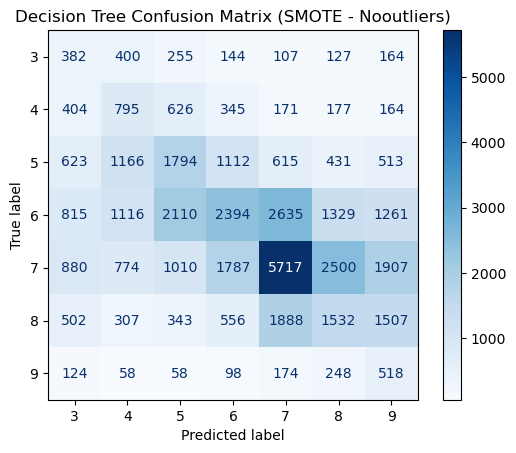

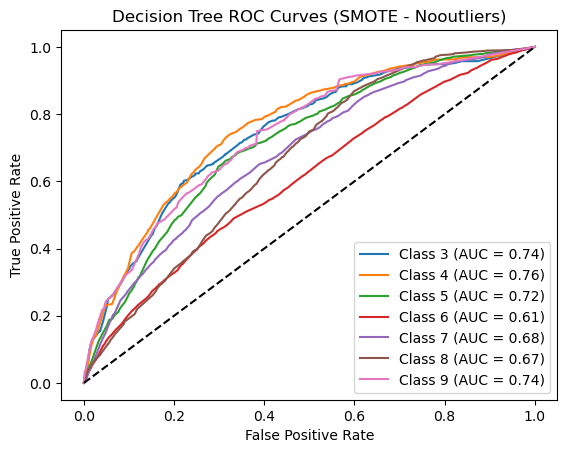

In [20]:
# =============================================================================
# Step 1: Apply SMOTE Oversampling (Nooutliers Dataset)
# =============================================================================
smote = SMOTE(random_state=42)
X_res_smote_nooutliers, y_res_smote_nooutliers = smote.fit_resample(X_train_scaled_nooutliers, y_train_nooutliers)

# =============================================================================
# Step 2: Plot Class Distribution After SMOTE (Nooutliers)
# =============================================================================
target_counts_smote_nooutliers = pd.Series(y_res_smote_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_smote_nooutliers.index, y=target_counts_smote_nooutliers.values, hue=target_counts_smote_nooutliers.index, palette='Blues', legend=False)
plt.title("Class Distribution After SMOTE (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV on SMOTE Data (Nooutliers)
# =============================================================================
param_grid_dt = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [10, 20],
    'min_samples_leaf': [5, 10],
    'criterion': ['entropy']
}

random_search_smote_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=3, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=15,
    scoring='accuracy'
)
random_search_smote_nooutliers.fit(X_res_smote_nooutliers, y_res_smote_nooutliers)
best_params_smote_nooutliers = random_search_smote_nooutliers.best_params_
print("\nBest hyperparameters for DT after SMOTE (Nooutliers):", best_params_smote_nooutliers)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using SMOTE Data (Nooutliers)
# =============================================================================
best_dt_smote_nooutliers = DecisionTreeClassifier(**best_params_smote_nooutliers, random_state=42)
best_dt_smote_nooutliers.fit(X_res_smote_nooutliers, y_res_smote_nooutliers)

# Predict on the test set
y_pred_smote_nooutliers = best_dt_smote_nooutliers.predict(X_test_scaled_nooutliers)
print("\nDecision Tree Classifier Report (After SMOTE - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_smote_nooutliers))

# =============================================================================
# Step 5: Plot Confusion Matrix (Nooutliers)
# =============================================================================
cm_smote_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_smote_nooutliers)
disp_smote_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_smote_nooutliers, display_labels=best_dt_smote_nooutliers.classes_)
disp_smote_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (SMOTE - Nooutliers)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the SMOTE Model (Nooutliers)
# =============================================================================
classes_smote_nooutliers = best_dt_smote_nooutliers.classes_
y_test_dt_bin_smote_nooutliers = label_binarize(y_test_nooutliers, classes=classes_smote_nooutliers)
y_score_smote_nooutliers = best_dt_smote_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_smote_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_smote_nooutliers[:, i], y_score_smote_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (SMOTE - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.2.3) ADASYN

ADASYN error: No samples will be generated with the provided ratio settings.


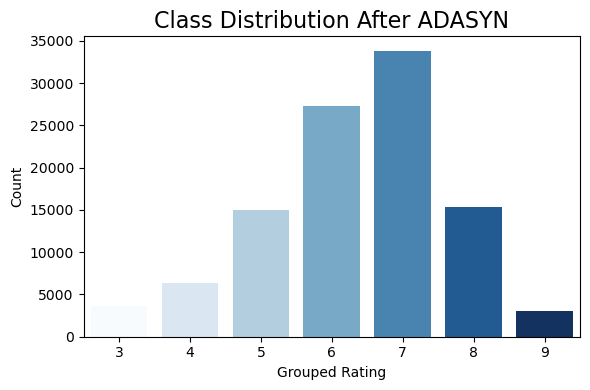


Best hyperparameters for DT after ADASYN (Preprocessed): {'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 9, 'criterion': 'entropy'}

Decision Tree Classifier Report (After ADASYN - Preprocessed):
              precision    recall  f1-score   support

           3       0.26      0.07      0.11      1585
           4       0.44      0.04      0.07      2688
           5       0.33      0.28      0.30      6279
           6       0.36      0.35      0.35     11696
           7       0.42      0.72      0.53     14657
           8       0.27      0.10      0.15      6677
           9       0.46      0.04      0.07      1278

    accuracy                           0.39     44860
   macro avg       0.36      0.23      0.22     44860
weighted avg       0.37      0.39      0.34     44860



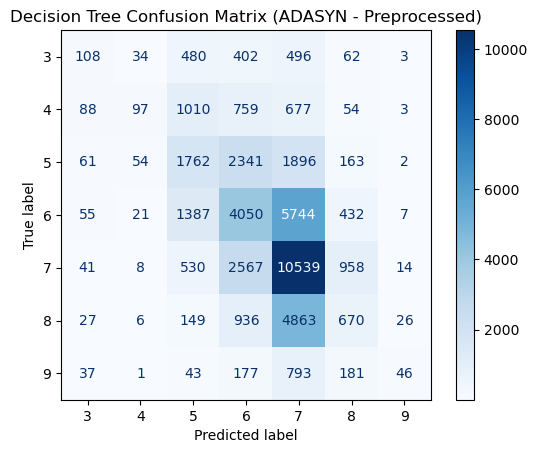

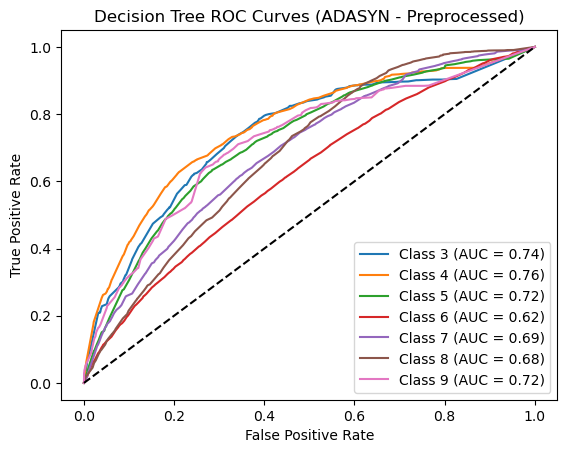

In [21]:
# =============================================================================
# Step 1: Apply ADASYN Oversampling (Preprocessed Dataset)
# =============================================================================
adasyn = ADASYN(sampling_strategy='auto', random_state=42)
try:
    X_res_adasyn_preprocessed, y_res_adasyn_preprocessed = adasyn.fit_resample(X_train_scaled_preprocessed, y_train_preprocessed)
except ValueError as e:
    print("ADASYN error:", e)
    X_res_adasyn_preprocessed, y_res_adasyn_preprocessed = X_train_scaled_preprocessed, y_train_preprocessed

# =============================================================================
# Step 2: Plot Class Distribution After ADASYN (Preprocessed)
# =============================================================================
target_counts_adasyn_preprocessed = pd.Series(y_res_adasyn_preprocessed).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_adasyn_preprocessed.index, y=target_counts_adasyn_preprocessed.values, hue=target_counts_adasyn_preprocessed.index, palette='Blues', legend=False)
plt.title("Class Distribution After ADASYN", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV on ADASYN Data (Preprocessed)
# =============================================================================
param_grid_dt = {
    'max_depth': [None] + list(range(2, 10)),
    'min_samples_split': [10, 50],
    'min_samples_leaf': [3],
    'criterion': ['entropy']
}

random_search_adasyn_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=15,
    scoring='accuracy'
)
random_search_adasyn_preprocessed.fit(X_res_adasyn_preprocessed, y_res_adasyn_preprocessed)
best_params_adasyn = random_search_adasyn_preprocessed.best_params_
print("\nBest hyperparameters for DT after ADASYN (Preprocessed):", best_params_adasyn)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using ADASYN Data (Preprocessed)
# =============================================================================
best_dt_adasyn_preprocessed = DecisionTreeClassifier(**best_params_adasyn, random_state=42)
best_dt_adasyn_preprocessed.fit(X_res_adasyn_preprocessed, y_res_adasyn_preprocessed)
y_pred_adasyn_preprocessed = best_dt_adasyn_preprocessed.predict(X_test_scaled_preprocessed)

print("\nDecision Tree Classifier Report (After ADASYN - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_adasyn_preprocessed))

# =============================================================================
# Step 5: Plot Confusion Matrix (Preprocessed)
# =============================================================================
cm_adasyn_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_adasyn_preprocessed)
disp_adasyn_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_adasyn_preprocessed, display_labels=best_dt_adasyn_preprocessed.classes_)
disp_adasyn_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (ADASYN - Preprocessed)")
plt.show()

# =============================================================================
# Step 6: Plot ROC Curves for the ADASYN Model (Preprocessed)
# =============================================================================
classes_adasyn = best_dt_adasyn_preprocessed.classes_
y_test_dt_bin_adasyn = label_binarize(y_test_preprocessed, classes=classes_adasyn)
y_score_adasyn = best_dt_adasyn_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_adasyn):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_adasyn[:, i], y_score_adasyn[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (ADASYN - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

ADASYN error: No samples will be generated with the provided ratio settings.


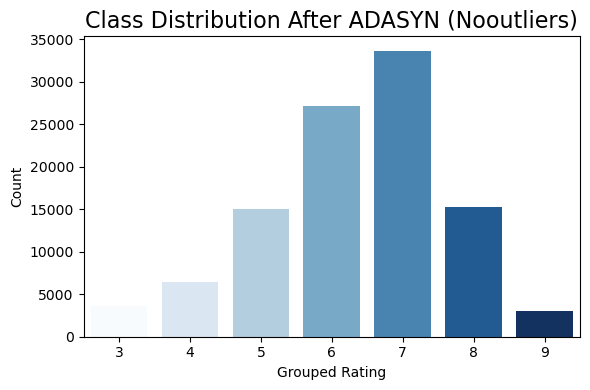

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_search.py:317: UserWarning: The total space of parameters 6 is smaller than n_iter=30. Running 6 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(



Best hyperparameters for DT after ADASYN (Nooutliers): {'min_samples_split': 10, 'min_samples_leaf': 3, 'max_depth': 7, 'criterion': 'entropy'}

Decision Tree Classifier Report (After ADASYN - Nooutliers):
              precision    recall  f1-score   support

           3       0.27      0.02      0.03      1579
           4       0.43      0.03      0.06      2682
           5       0.33      0.22      0.26      6254
           6       0.33      0.41      0.37     11660
           7       0.43      0.69      0.53     14575
           8       0.27      0.08      0.12      6635
           9       0.44      0.03      0.06      1278

    accuracy                           0.38     44663
   macro avg       0.36      0.21      0.20     44663
weighted avg       0.36      0.38      0.33     44663



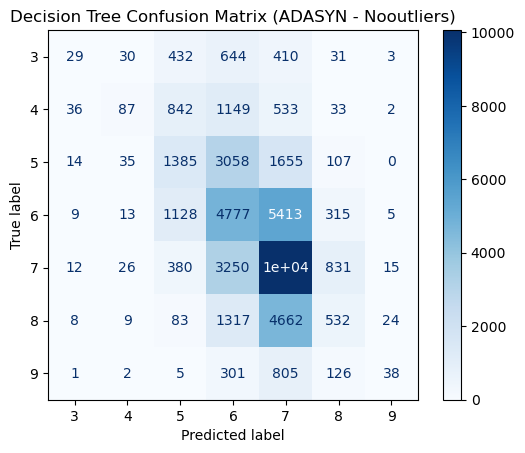

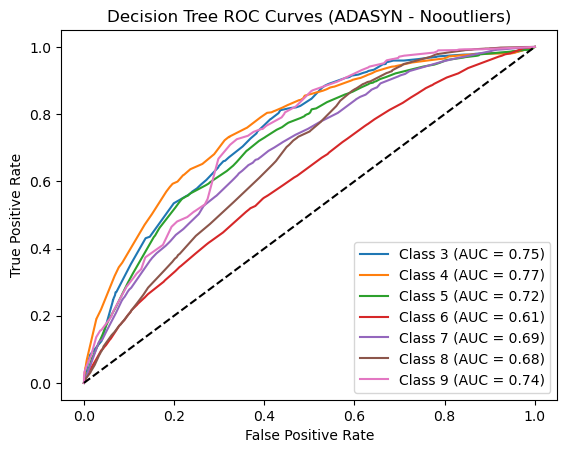

In [22]:
# =============================================================================
# Step 1: Apply ADASYN Oversampling (Nooutliers Dataset)
# =============================================================================
adasyn_nooutliers = ADASYN(sampling_strategy='auto', random_state=42)
try:
    X_res_adasyn_nooutliers, y_res_adasyn_nooutliers = adasyn_nooutliers.fit_resample(X_train_scaled_nooutliers, y_train_nooutliers)
except ValueError as e:
    print('ADASYN error:', e)
    X_res_adasyn_nooutliers, y_res_adasyn_nooutliers = X_train_scaled_nooutliers, y_train_nooutliers

# =============================================================================
# Step 2: Plot Class Distribution After ADASYN (Nooutliers)
# =============================================================================
target_counts_adasyn_nooutliers = pd.Series(y_res_adasyn_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_adasyn_nooutliers.index, y=target_counts_adasyn_nooutliers.values, hue=target_counts_adasyn_nooutliers.index, palette='Blues', legend=False)
plt.title("Class Distribution After ADASYN (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV on ADASYN Data (Nooutliers)
# =============================================================================
param_grid_dt = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [10, 50],
    'min_samples_leaf': [3],
    'criterion': ['entropy']
}

random_search_adasyn_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_adasyn_nooutliers.fit(X_res_adasyn_nooutliers, y_res_adasyn_nooutliers)
best_params_adasyn_nooutliers = random_search_adasyn_nooutliers.best_params_
print("\nBest hyperparameters for DT after ADASYN (Nooutliers):", best_params_adasyn_nooutliers)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier Using ADASYN Data (Nooutliers)
# =============================================================================
best_dt_adasyn_nooutliers = DecisionTreeClassifier(**best_params_adasyn_nooutliers, random_state=42)
best_dt_adasyn_nooutliers.fit(X_res_adasyn_nooutliers, y_res_adasyn_nooutliers)

# Predict on the test set
y_pred_adasyn_nooutliers = best_dt_adasyn_nooutliers.predict(X_test_scaled_nooutliers)
print("\nDecision Tree Classifier Report (After ADASYN - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_adasyn_nooutliers))

# =============================================================================
# Step 5: Plot Confusion Matrix (Nooutliers)
# =============================================================================
cm_adasyn_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_adasyn_nooutliers)
disp_adasyn_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_adasyn_nooutliers, display_labels=best_dt_adasyn_nooutliers.classes_)
disp_adasyn_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (ADASYN - Nooutliers)")
plt.show()

# =============================================================================
# Step 6: ROC Curve Evaluation for the ADASYN Model (Nooutliers)
# =============================================================================
classes_adasyn_nooutliers = best_dt_adasyn_nooutliers.classes_
y_test_dt_bin_adasyn_nooutliers = label_binarize(y_test_nooutliers, classes=classes_adasyn_nooutliers)
y_score_adasyn_nooutliers = best_dt_adasyn_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_adasyn_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_adasyn_nooutliers[:, i], y_score_adasyn_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (ADASYN - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.3) Algorithmic-Level Adjustments

### 2.3.1) Adjusting Class Weights

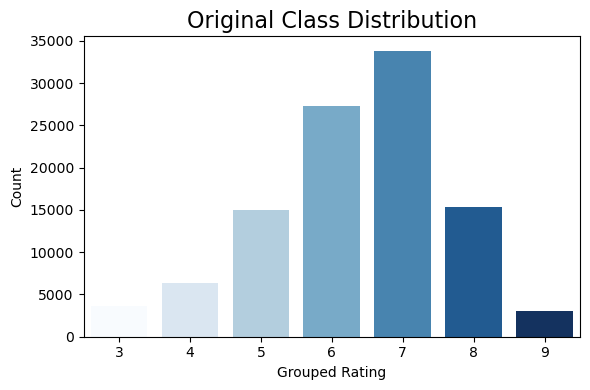


Best hyperparameters for DT with class_weight='balanced': {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 9, 'criterion': 'entropy'}

Decision Tree Classifier Report (Class Weights Balanced):
              precision    recall  f1-score   support

           3       0.09      0.43      0.15      1585
           4       0.15      0.34      0.21      2688
           5       0.31      0.22      0.25      6279
           6       0.41      0.11      0.18     11696
           7       0.53      0.32      0.40     14657
           8       0.23      0.27      0.25      6677
           9       0.08      0.42      0.13      1278

    accuracy                           0.25     44860
   macro avg       0.26      0.30      0.22     44860
weighted avg       0.37      0.25      0.27     44860



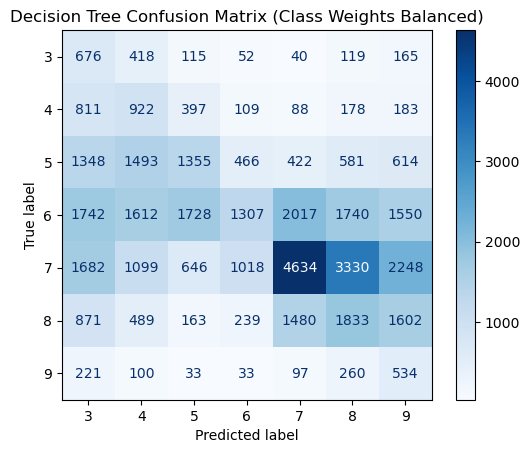

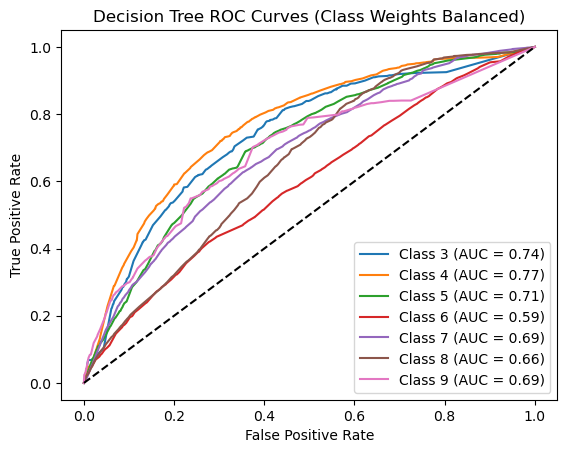

In [23]:
# =============================================================================
# Step 1: Plot Original Class Distribution (No Resampling Applied)
# =============================================================================
target_counts_orig = pd.Series(y_train_preprocessed).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_orig.index, y=target_counts_orig.values, hue=target_counts_orig.index, palette='Blues', legend=False)
plt.title("Original Class Distribution", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 2: Hyperparameter Tuning with RandomizedSearchCV
# =============================================================================
# Define parameter grid
param_grid_dt = {
    'max_depth': list(range(2, 10)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

# Initialize RandomizedSearchCV with a DT that has balanced class weights
random_search_balanced = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_balanced.fit(X_train_scaled_preprocessed, y_train_preprocessed)
best_params_balanced = random_search_balanced.best_params_
print("\nBest hyperparameters for DT with class_weight='balanced':", best_params_balanced)

# =============================================================================
# Step 3: Train & Evaluate Decision Tree Classifier with Adjusted Class Weights
# =============================================================================
best_dt_balanced = DecisionTreeClassifier(**best_params_balanced, random_state=42, class_weight='balanced')
best_dt_balanced.fit(X_train_scaled_preprocessed, y_train_preprocessed)
y_pred_balanced = best_dt_balanced.predict(X_test_scaled_preprocessed)

print("\nDecision Tree Classifier Report (Class Weights Balanced):")
print(classification_report(y_test_preprocessed, y_pred_balanced))

# =============================================================================
# Step 4: Plot Confusion Matrix
# =============================================================================
cm_balanced = confusion_matrix(y_test_preprocessed, y_pred_balanced)
disp_balanced = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=best_dt_balanced.classes_)
disp_balanced.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Class Weights Balanced)")
plt.show()

# =============================================================================
# Step 5: Plot ROC Curves for the Balanced Model
# =============================================================================
classes_balanced = best_dt_balanced.classes_
y_test_bin_balanced = label_binarize(y_test_preprocessed, classes=classes_balanced)
y_score_balanced = best_dt_balanced.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_balanced):
    fpr, tpr, _ = roc_curve(y_test_bin_balanced[:, i], y_score_balanced[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Class Weights Balanced)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

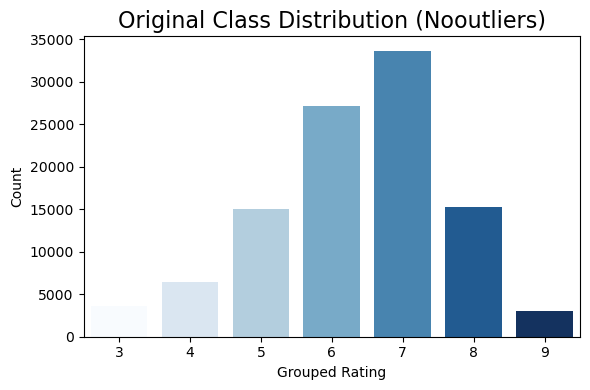


Best hyperparameters for DT with class_weight='balanced' (Nooutliers): {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 9, 'criterion': 'entropy'}

Decision Tree Classifier Report (Class Weights Balanced - Nooutliers):
              precision    recall  f1-score   support

           3       0.09      0.37      0.14      1579
           4       0.15      0.41      0.22      2682
           5       0.30      0.20      0.24      6254
           6       0.40      0.10      0.16     11660
           7       0.52      0.32      0.40     14575
           8       0.23      0.29      0.26      6635
           9       0.08      0.40      0.14      1278

    accuracy                           0.25     44663
   macro avg       0.25      0.30      0.22     44663
weighted avg       0.37      0.25      0.27     44663



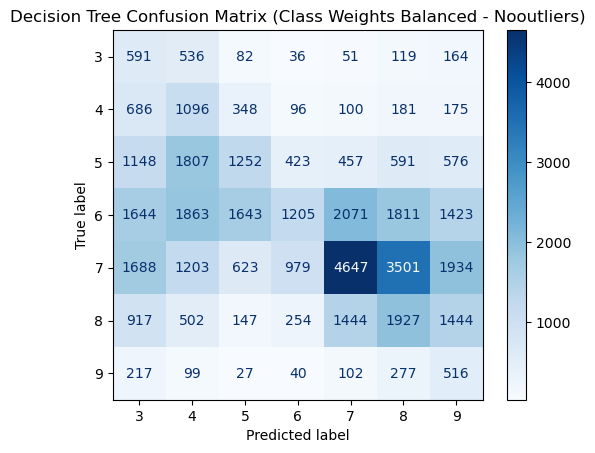

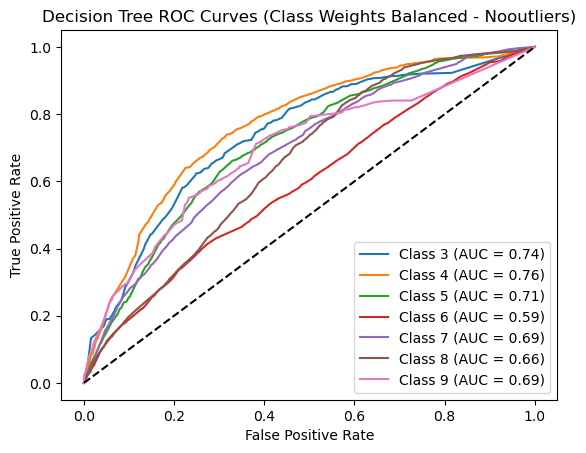

In [24]:
# =============================================================================
# Step 1: Plot Original Class Distribution (No Resampling Applied - Nooutliers)
# =============================================================================
target_counts_orig_nooutliers = pd.Series(y_train_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_orig_nooutliers.index, y=target_counts_orig_nooutliers.values, hue=target_counts_orig_nooutliers.index, palette='Blues', legend=False)
plt.title("Original Class Distribution (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 2: Hyperparameter Tuning with RandomizedSearchCV (with Adjusted Class Weights) on Nooutliers Data
# =============================================================================
param_grid_dt = {
    'max_depth': list(range(2, 10)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_balanced_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_balanced_nooutliers.fit(X_train_scaled_nooutliers, y_train_nooutliers)
best_params_balanced_nooutliers = random_search_balanced_nooutliers.best_params_
print("\nBest hyperparameters for DT with class_weight='balanced' (Nooutliers):", best_params_balanced_nooutliers)

# =============================================================================
# Step 3: Train & Evaluate Decision Tree Classifier with Adjusted Class Weights (Nooutliers)
# =============================================================================
best_dt_balanced_nooutliers = DecisionTreeClassifier(**best_params_balanced_nooutliers, random_state=42, class_weight='balanced')
best_dt_balanced_nooutliers.fit(X_train_scaled_nooutliers, y_train_nooutliers)
y_pred_balanced_nooutliers = best_dt_balanced_nooutliers.predict(X_test_scaled_nooutliers)

print("\nDecision Tree Classifier Report (Class Weights Balanced - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_balanced_nooutliers))

# =============================================================================
# Step 4: Plot Confusion Matrix (Nooutliers)
# =============================================================================
cm_balanced_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_balanced_nooutliers)
disp_balanced_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_balanced_nooutliers, display_labels=best_dt_balanced_nooutliers.classes_)
disp_balanced_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Class Weights Balanced - Nooutliers)")
plt.show()

# =============================================================================
# Step 5: Plot ROC Curves for the Balanced Model (Nooutliers)
# =============================================================================
classes_balanced_nooutliers = best_dt_balanced_nooutliers.classes_
y_test_dt_bin_nooutliers = label_binarize(y_test_nooutliers, classes=classes_balanced_nooutliers)
y_score_balanced_nooutliers = best_dt_balanced_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_balanced_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_nooutliers[:, i], y_score_balanced_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Class Weights Balanced - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.3.2) Adjusting Class Weights Manually


Best hyperparameters for DT with manual class weights (Preprocessed): {'min_samples_split': 10, 'min_samples_leaf': 5, 'max_depth': 9, 'criterion': 'entropy'}

Decision Tree Classifier Report (Manual Class Weights - Preprocessed):
              precision    recall  f1-score   support

           3       0.09      0.24      0.14      1585
           4       0.14      0.55      0.23      2688
           5       0.29      0.17      0.22      6279
           6       0.42      0.09      0.15     11696
           7       0.50      0.39      0.44     14657
           8       0.24      0.37      0.29      6677
           9       0.09      0.19      0.13      1278

    accuracy                           0.28     44860
   macro avg       0.25      0.28      0.23     44860
weighted avg       0.36      0.28      0.28     44860



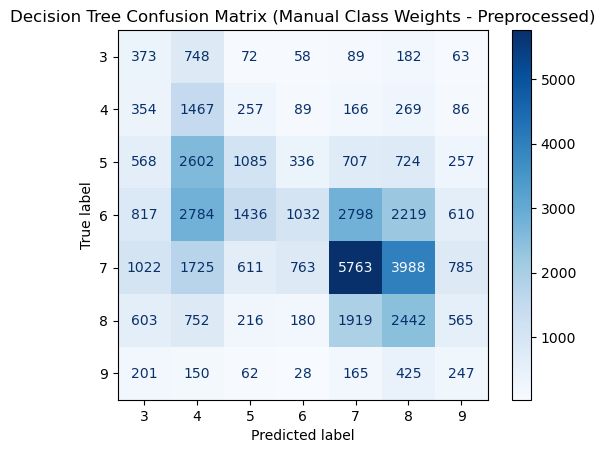

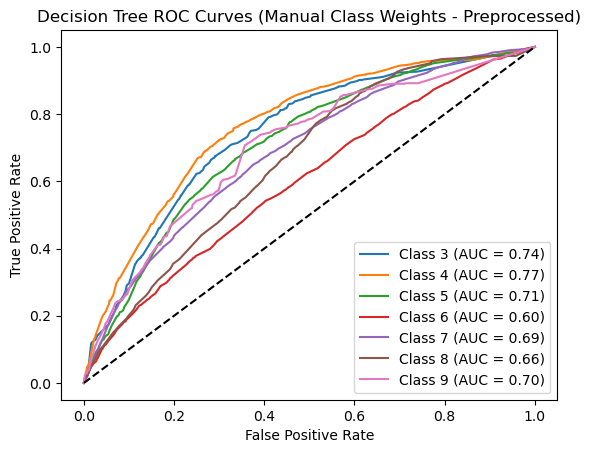

In [25]:
# =============================================================================
# Step 2: Define Manual Class Weights
# =============================================================================
# Assuming the following distribution for groupedRating:
manual_class_weights = {
    3: 3.0,
    4: 2.5,
    5: 1.0,
    6: 0.5,
    7: 0.5,
    8: 1.0,
    9: 3.0
}

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV with Manual Class Weights
# =============================================================================
param_grid_dt = {
    'max_depth': list(range(2, 10)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_manual_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight=manual_class_weights),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_manual_preprocessed.fit(X_train_scaled_preprocessed, y_train_preprocessed)
best_params_manual_preprocessed = random_search_manual_preprocessed.best_params_
print("\nBest hyperparameters for DT with manual class weights (Preprocessed):", best_params_manual_preprocessed)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier with Manual Class Weights (Preprocessed)
# =============================================================================
best_dt_manual_preprocessed = DecisionTreeClassifier(**best_params_manual_preprocessed, random_state=42, class_weight=manual_class_weights)
best_dt_manual_preprocessed.fit(X_train_scaled_preprocessed, y_train_preprocessed)
y_pred_manual_preprocessed = best_dt_manual_preprocessed.predict(X_test_scaled_preprocessed)

print("\nDecision Tree Classifier Report (Manual Class Weights - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_manual_preprocessed))

# =============================================================================
# Step 5: Plot Confusion Matrix (Preprocessed)
# =============================================================================
cm_manual_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_manual_preprocessed)
disp_manual_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_manual_preprocessed, display_labels=best_dt_manual_preprocessed.classes_)
disp_manual_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Manual Class Weights - Preprocessed)")
plt.show()

# =============================================================================
# Step 6: Plot ROC Curves for the Model with Manual Class Weights (Preprocessed)
# =============================================================================
classes_manual = best_dt_manual_preprocessed.classes_
y_test_bin_manual_preprocessed = label_binarize(y_test_preprocessed, classes=classes_manual)
y_score_manual_preprocessed = best_dt_manual_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(classes_manual):
    fpr, tpr, _ = roc_curve(y_test_bin_manual_preprocessed[:, i], y_score_manual_preprocessed[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Manual Class Weights - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

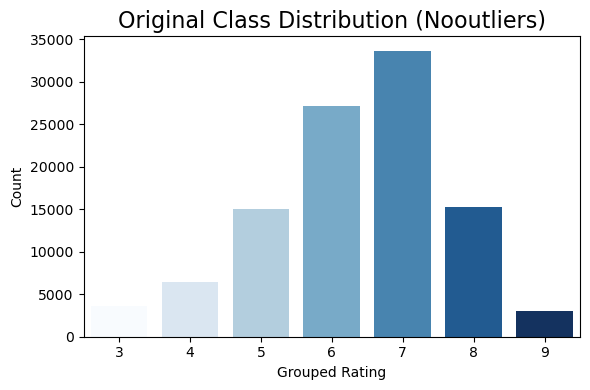


Best hyperparameters for DT with manual class weights (Nooutliers): {'min_samples_split': 20, 'min_samples_leaf': 3, 'max_depth': 6, 'criterion': 'entropy'}

Decision Tree Classifier Report (Manual Class Weights - Nooutliers):
              precision    recall  f1-score   support

           3       0.06      0.17      0.09      1579
           4       0.16      0.41      0.23      2682
           5       0.28      0.32      0.30      6254
           6       0.40      0.10      0.16     11660
           7       0.50      0.45      0.48     14575
           8       0.22      0.23      0.23      6635
           9       0.07      0.17      0.10      1278

    accuracy                           0.29     44663
   macro avg       0.24      0.26      0.23     44663
weighted avg       0.35      0.29      0.29     44663



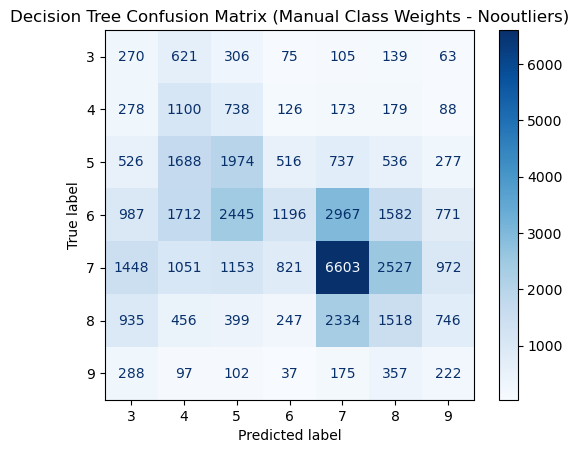

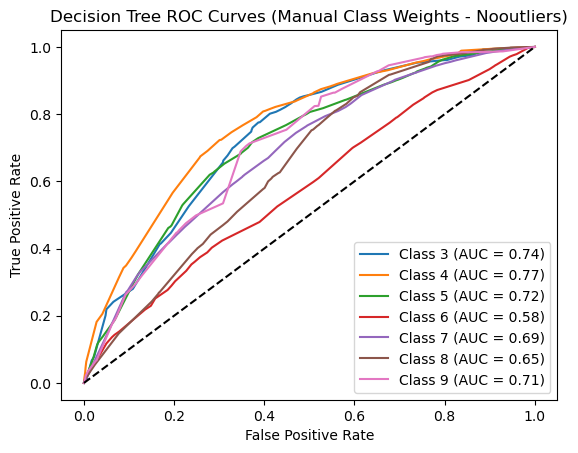

In [26]:
# =============================================================================
# Step 1: (Optional) Plot Original Class Distribution (No Resampling Applied - Nooutliers)
# =============================================================================
target_counts_orig_nooutliers = pd.Series(y_train_nooutliers).value_counts()
plt.figure(figsize=(6, 4))
sns.barplot(x=target_counts_orig_nooutliers.index, y=target_counts_orig_nooutliers.values, hue=target_counts_orig_nooutliers.index, palette='Blues', legend=False)
plt.title("Original Class Distribution (Nooutliers)", fontsize=16)
plt.xlabel("Grouped Rating")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

# =============================================================================
# Step 2: Define Manual Class Weights (Nooutliers)
# =============================================================================
manual_class_weights_nooutliers = {
    3: 3.0,
    4: 2.0,
    5: 1.0,
    6: 0.5,
    7: 0.5,
    8: 1.0,
    9: 3.0
}

# =============================================================================
# Step 3: Hyperparameter Tuning Using RandomizedSearchCV with Manual Class Weights (Nooutliers)
# =============================================================================
param_grid_dt = {
    'max_depth': list(range(2, 10)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [3],
    'criterion': ['entropy']
}

random_search_manual_nooutliers = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight=manual_class_weights_nooutliers),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=15,
    scoring='accuracy'
)
random_search_manual_nooutliers.fit(X_train_scaled_nooutliers, y_train_nooutliers)
best_params_manual_nooutliers = random_search_manual_nooutliers.best_params_
print("\nBest hyperparameters for DT with manual class weights (Nooutliers):", best_params_manual_nooutliers)

# =============================================================================
# Step 4: Train & Evaluate Decision Tree Classifier with Manual Class Weights (Nooutliers)
# =============================================================================
best_dt_manual_nooutliers = DecisionTreeClassifier(**best_params_manual_nooutliers, random_state=42, class_weight=manual_class_weights_nooutliers)
best_dt_manual_nooutliers.fit(X_train_scaled_nooutliers, y_train_nooutliers)
y_pred_manual_nooutliers = best_dt_manual_nooutliers.predict(X_test_scaled_nooutliers)

print("\nDecision Tree Classifier Report (Manual Class Weights - Nooutliers):")
print(classification_report(y_test_nooutliers, y_pred_manual_nooutliers))

# =============================================================================
# Step 5: Plot Confusion Matrix (Nooutliers)
# =============================================================================
cm_manual_nooutliers = confusion_matrix(y_test_nooutliers, y_pred_manual_nooutliers)
disp_manual_nooutliers = ConfusionMatrixDisplay(confusion_matrix=cm_manual_nooutliers, display_labels=best_dt_manual_nooutliers.classes_)
disp_manual_nooutliers.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Manual Class Weights - Nooutliers)")
plt.show()

# =============================================================================
# Step 6: Plot ROC Curves for the Model with Manual Class Weights (Nooutliers)
# =============================================================================
classes_manual_nooutliers = best_dt_manual_nooutliers.classes_
y_test_dt_bin_manual_nooutliers = label_binarize(y_test_nooutliers, classes=classes_manual_nooutliers)
y_score_manual_nooutliers = best_dt_manual_nooutliers.predict_proba(X_test_scaled_nooutliers)

plt.figure()
for i, cls in enumerate(classes_manual_nooutliers):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_manual_nooutliers[:, i], y_score_manual_nooutliers[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Manual Class Weights - Nooutliers)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()

### 2.3.3) Adjusting Decision Thresholds


Best hyperparameters for DT (default threshold, Preprocessed): {'min_samples_split': 20, 'min_samples_leaf': 5, 'max_depth': 11, 'criterion': 'entropy'}

Decision Tree Classifier Report (Adjusted Decision Thresholds - Preprocessed):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.00      0.00      0.00         0
           2       0.00      0.00      0.00         0
           3       0.04      0.26      0.07      1585
           4       0.03      0.24      0.05      2688
           5       0.07      0.03      0.04      6279
           6       0.10      0.00      0.00     11696
           7       0.00      0.00      0.00     14657
           8       0.00      0.00      0.00      6677
           9       0.00      0.00      0.00      1278

    accuracy                           0.03     44860
   macro avg       0.02      0.05      0.02     44860
weighted avg       0.04      0.03      0.01     44860



/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/opt/anaconda3/lib/python3.12/site-packages/s

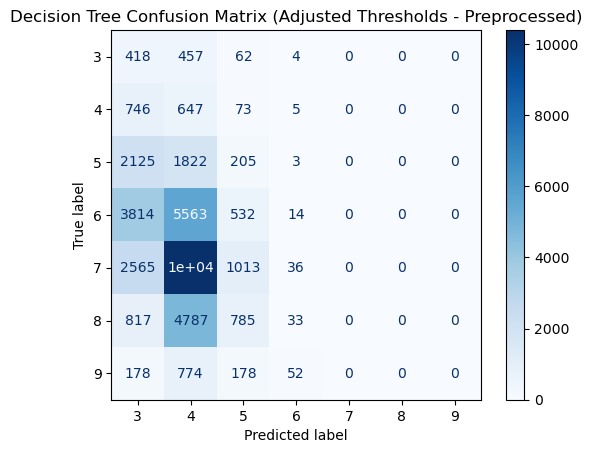

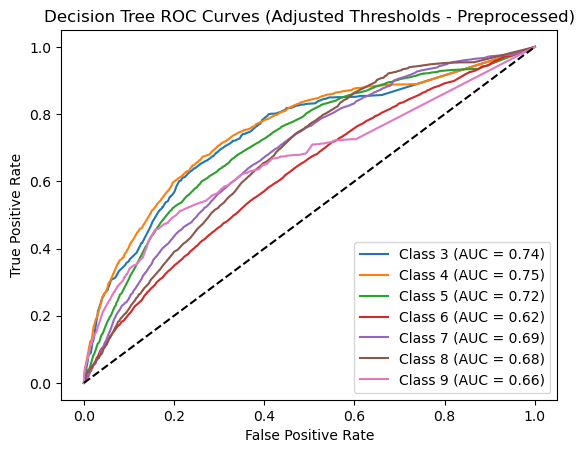

In [27]:
# =============================================================================
# Step 2: Hyperparameter Tuning Using RandomizedSearchCV (Preprocessed)
# =============================================================================
param_grid_dt = {
    'max_depth': [None] + list(range(2, 20)),
    'min_samples_split': [10, 20, 50],
    'min_samples_leaf': [5, 10, 20],
    'criterion': ['entropy']
}

random_search_thresh_preprocessed = RandomizedSearchCV(
    DecisionTreeClassifier(random_state=42),
    param_distributions=param_grid_dt,
    cv=RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=42),
    n_jobs=-1,
    refit=True,
    n_iter=30,
    scoring='accuracy'
)
random_search_thresh_preprocessed.fit(X_train_scaled_preprocessed, y_train_preprocessed)
best_params_thresh_preprocessed = random_search_thresh_preprocessed.best_params_
print("\nBest hyperparameters for DT (default threshold, Preprocessed):", best_params_thresh_preprocessed)

# =============================================================================
# Step 3: Train Decision Tree Classifier with Best Parameters (Preprocessed)
# =============================================================================
best_dt_thresh_preprocessed = DecisionTreeClassifier(**best_params_thresh_preprocessed, random_state=42)
best_dt_thresh_preprocessed.fit(X_train_scaled_preprocessed, y_train_preprocessed)

# =============================================================================
# Step 4: Adjust Decision Threshold for Each Class (Preprocessed)
# =============================================================================
def adjusted_multiclass_predict(X, clf, thresholds):
    # Get predicted probabilities for each class
    y_probs = clf.predict_proba(X)
    
    # Initialize an array for adjusted predictions
    adjusted_preds = np.zeros_like(y_probs)
    
    # Apply per-class threshold adjustments
    for i, cls in enumerate(clf.classes_):
        adjusted_preds[:, i] = y_probs[:, i] > thresholds[cls]
    
    # For each sample, if nessuna soglia è superata, utilizza argmax dei valori originali,
    # altrimenti scegli la classe con la probabilità "thresholded" massima.
    final_preds = []
    for j in range(X.shape[0]):
        if adjusted_preds[j].sum() == 0:
            final_preds.append(np.argmax(y_probs[j]))
        else:
            final_preds.append(np.argmax(adjusted_preds[j]))
    return np.array(final_preds)

# Define class-specific decision thresholds for each new target class
# New target classes: 3, 4, 5, 6, 7, 8, 9
class_thresholds_preprocessed = {
    3: 0.5,
    4: 0.45,
    5: 0.4,
    6: 0.4,
    7: 0.4,
    8: 0.45,
    9: 0.5
}

# Use adjusted_multiclass_predict on the test set
y_pred_thresh_preprocessed = adjusted_multiclass_predict(X_test_scaled_preprocessed, best_dt_thresh_preprocessed, class_thresholds_preprocessed)

print("\nDecision Tree Classifier Report (Adjusted Decision Thresholds - Preprocessed):")
print(classification_report(y_test_preprocessed, y_pred_thresh_preprocessed))

# =============================================================================
# Step 5: Plot Confusion Matrix for Adjusted Predictions (Preprocessed)
# =============================================================================
# Definire esplicitamente le classi target attese
target_classes_preprocessed = np.array([3, 4, 5, 6, 7, 8, 9])
cm_thresh_preprocessed = confusion_matrix(y_test_preprocessed, y_pred_thresh_preprocessed, labels=target_classes_preprocessed)
disp_thresh_preprocessed = ConfusionMatrixDisplay(confusion_matrix=cm_thresh_preprocessed, display_labels=target_classes_preprocessed)
disp_thresh_preprocessed.plot(cmap='Blues')
plt.title("Decision Tree Confusion Matrix (Adjusted Thresholds - Preprocessed)")
plt.show()

# =============================================================================
# Step 6: Plot ROC Curves (Preprocessed)
# =============================================================================
y_test_dt_bin_preprocessed = label_binarize(y_test_preprocessed, classes=target_classes_preprocessed)
y_score_thresh_preprocessed = best_dt_thresh_preprocessed.predict_proba(X_test_scaled_preprocessed)

plt.figure()
for i, cls in enumerate(target_classes_preprocessed):
    fpr, tpr, _ = roc_curve(y_test_dt_bin_preprocessed[:, i], y_score_thresh_preprocessed[:, i])
    plt.plot(fpr, tpr, label=f'Class {cls} (AUC = {auc(fpr, tpr):.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Decision Tree ROC Curves (Adjusted Thresholds - Preprocessed)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.show()